# CHURN CUSTOMER ANALYSIS
## PROJECT BY SHAGUN GUPTA

In [1]:
#IMPORT REQUIRED LIBRARIES 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
#read the csv file 
my_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn[1].csv")

In [3]:
#print first 5 rows of the dataset 
my_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
#to check total number of rows and columns in dataset
my_data.shape

(7043, 21)

In [5]:
#check the columns in the data set 
my_data.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# checking the data types of all the columns 
my_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#checking the descriptive statistics (of columns without object data types )
my_data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [8]:
# ANALYSING THE TARGET VARIABLE 
my_data["Churn"].value_counts()



No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Target variable count')

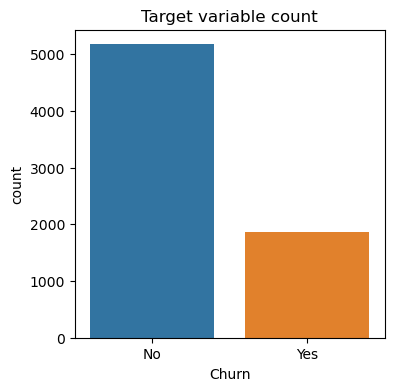

In [9]:
plt.figure(figsize = (4,4))
sns.countplot(x = my_data["Churn"])
plt.title("Target variable count")


In [10]:
my_data["Churn"].value_counts()/len(my_data["Churn"])

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

#### data is imbalanced :  ratio is 73:26

In [11]:
# check the consice summary of data and non null values 
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#checking for null and missing values 
my_data.isnull()


customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False           False  ...   
1            False          False            False           False  ...   
2            False          False            False           False  ...   
3            False          False            False           False  ...   
4            False          False            False           False  ...   
...            ...            ...              ...             ...  ...   
7038         False          False            False           False  ...   
7039         False          False            False           False  ...   
7040         False          False            False           False  ...   
7041         False          False            False           False  ...   
7042         False          False            False           False  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                False        False        False            False     False   
1                False        False        False            False     False   
2                False        False        False            False     False   
3                False        False        False            False     False   
4                False        False        False            False     False   
...                ...          ...          ...              ...       ...   
7038             False        False        False            False     False   
7039             False        False        False            False     False   
7040             False        False        False            False     False   
7041             False        False        False            False     False   
7042             False        False        False            False     False   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                False          False           False         False  False  
1                False          False           False         False  False  
2                False          False           False         False  False  
3                False          False           False         False  False  
4                False          False           False         False  False  
...                ...            ...             ...           ...    ...  
7038             False          False           False         False  False  
7039             False          False           False         False  False  
7040             False          False           False         False  False  
7041             False          False           False         False  False  
7042             False          False           False         False  False  

[7043 rows x 21 columns]

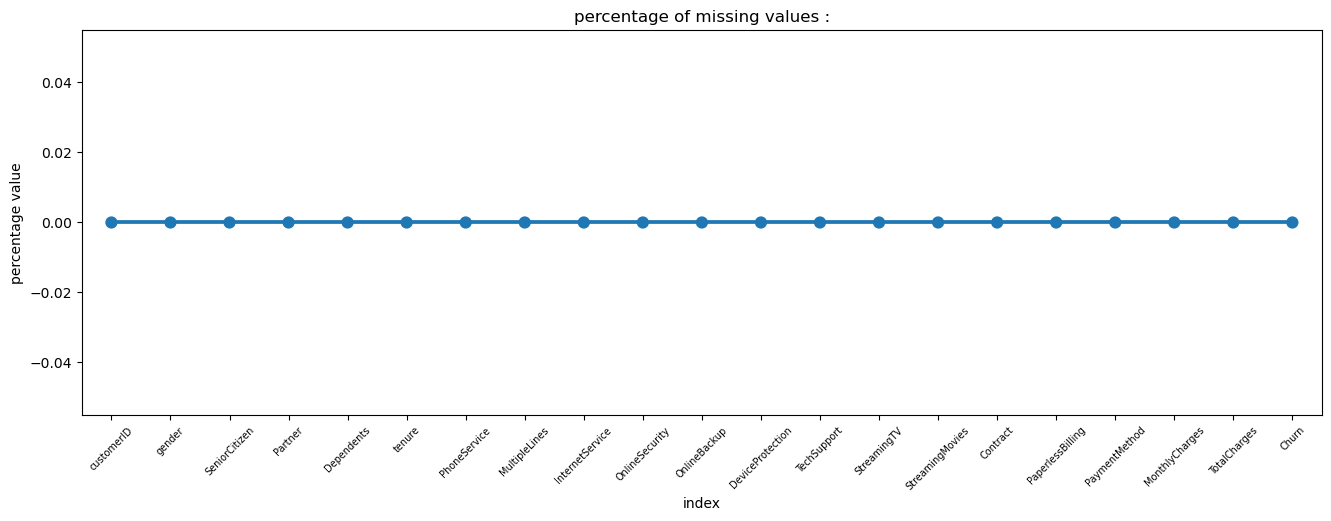

In [13]:
#checking the percentage of missing values in every coloumn
missing= pd.DataFrame((my_data.isnull().sum())*100/my_data.shape[0]).reset_index()
plt.figure(figsize = (16 ,  5 ))
g = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=45 , fontsize = 7 )
plt.title("percentage of missing values :")
plt.ylabel("percentage value")
plt.show()

In [14]:
my_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### There are no null or missing values in data 

In [15]:
my_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [16]:
my_data.duplicated().sum()

0

##### no duplicacy in the dataset 

In [17]:
my_data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

# Data cleaning 

In [18]:
my_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
##### since total charges holds numeric values but its dtype is object we need to do convert to numeric

In [20]:
#creating a copy of dataset
df = my_data.copy()

In [21]:
df.TotalCharges = pd.to_numeric(df.TotalCharges , errors='coerce')


In [22]:
df


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

In [23]:
#now check again for missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

###### now we see TotalCharges has 11 missing values 

In [24]:
#getting the rows with nulll values of totalcharges
df.loc[df['TotalCharges'].isnull()==True]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

###### since the number of null records is very low (11) as compared to whole dataset we can ignore these records 

In [25]:
#drop missing values 
df.dropna(how = 'any' , inplace = True)

In [26]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7032 rows x 21 columns]

###### now we have 7032 rows . initially we had 7043 rows that means missing value rows have been removed  

##### Dividing customers into bins based on tenure...like 1-2years..this will let us know which group is more likely to churn

In [27]:
# moximum tenure is ...
df['tenure'].max()

72

In [28]:
labels = ['{0}-{1}'.format(i , i+11) for i in range(0,72,12)]
df["tenure_group"] = pd.cut(df.tenure , range(1,80,12)  , right = False , labels = labels )  

In [29]:
df['tenure_group'].value_counts()

0-11     2175
60-71    1407
12-23    1024
24-35     832
48-59     832
36-47     762
Name: tenure_group, dtype: int64

In [30]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No          No              No  Month-to-month              Yes   
1             No          No              No        One year               No   
2             No          No              No  Month-to-month              Yes   
3            Yes          No              No        One year               No   
4             No          No              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7038         Yes         Yes             Yes        One year              Yes   
7039          No         Yes             Yes        One year              Yes   
7040          No          No              No  Month-to-month              Yes   
7041          No          No              No  Month-to-month              Yes   
7042         Yes         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  \
0              Electronic check          29.85        29.85     No   
1                  Mailed check          56.95      1889.50     No   
2                  Mailed check          53.85       108.15    Yes   
3     Bank transfer (automatic)          42.30      1840.75     No   
4              Electronic check          70.70       151.65    Yes   
...                         ...            ...          ...    ...   
7038               Mailed check          84.80      1990.50     No   
7039    Credit card (automatic)         103.20      7362.90     No   
7040           Electronic check          29.60       346.45     No   
7041               Mailed check          74.40       306.60    Yes   
7042  Bank transfer (automatic)         105.65      6844.50     No   

      tenure_group  
0             0-11  
1            24-35  
2             0-11  
3            36-47  
4             0-11  
...            ...  
7038         12-23  
7039         60-71  
7040          0-11  
7041          0-11  
7042         60-71  

[7032 rows x 22 columns]

##### a new column tenure_group is created (tenure bins )

#### removing unneccessary columns 

##### customerID has no impact on churn and we already have tenure_group so remove tenure 

In [31]:
#dropping coluns customerID and tenure 
df.drop(columns = ['customerID'  ,'tenure'] , axis=1 , inplace = True )

In [32]:
df

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0     Female              0     Yes         No           No  No phone service   
1       Male              0      No         No          Yes                No   
2       Male              0      No         No          Yes                No   
3       Male              0      No         No           No  No phone service   
4     Female              0      No         No          Yes                No   
...      ...            ...     ...        ...          ...               ...   
7038    Male              0     Yes        Yes          Yes               Yes   
7039  Female              0     Yes        Yes          Yes               Yes   
7040  Female              0     Yes        Yes           No  No phone service   
7041    Male              1     Yes         No          Yes               Yes   
7042    Male              0      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  \
0              Electronic check           29.85         29.85    No   
1                  Mailed check           56.95       1889.50    No   
2                  Mailed check           53.85        108.15   Yes   
3     Bank transfer (automatic)           42.30       1840.75    No   
4              Electronic check           70.70        151.65   Yes   
...                         ...             ...           ...   ...   
7038               Mailed check           84.80       1990.50    No   
7039    Credit card (automatic)          103.20       7362.90    No   
7040           Electronic check           29.60        346.45    No   
7041               Mailed check           74.40        306.60   Yes   
7042  Bank transfer (automatic)          105.65       6844.50    No   

     tenure_group  
0            0-11  
1           24-35  
2            0-11  
3           36-47  
4            0-11  
...           ...  
7038        12-23  
7039        60-71  
7040         0-11  
7041         0-11  
7042        60-71  

[7032 rows x 20 columns]

# Data vizualization and exploration

## Univariate Analysis 

##### 1 . plot distribution of individual predictors by churn

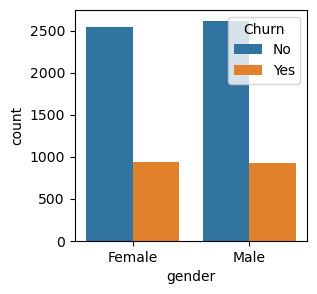

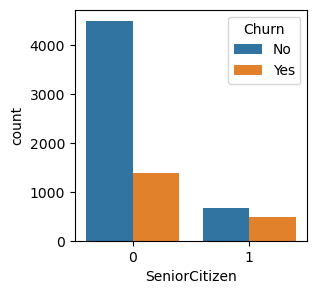

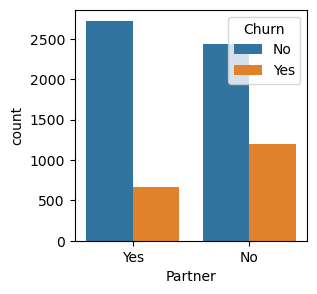

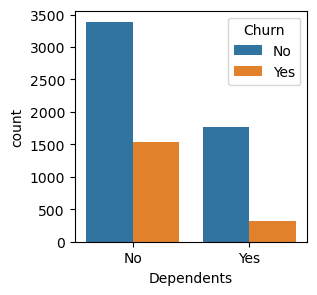

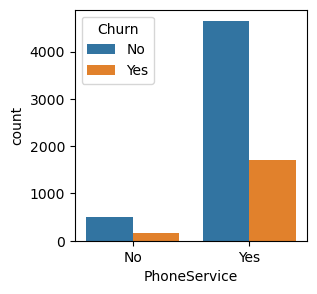

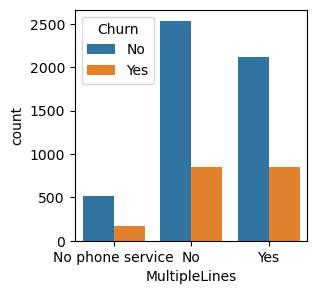

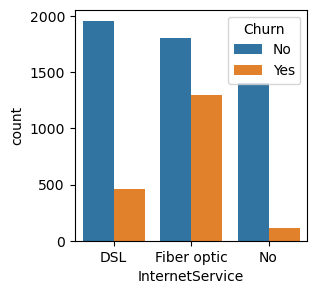

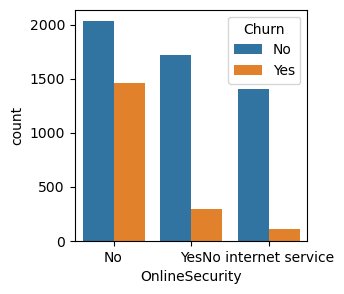

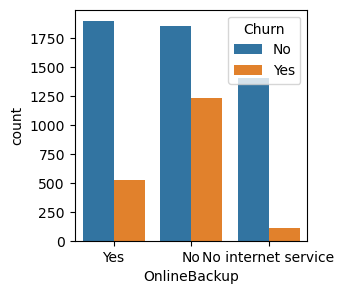

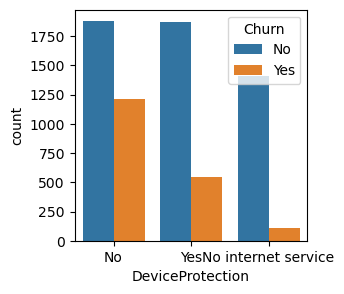

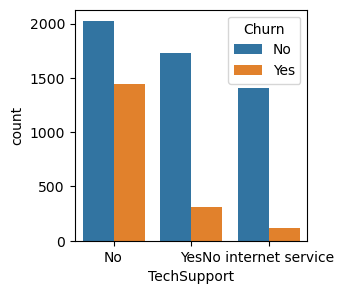

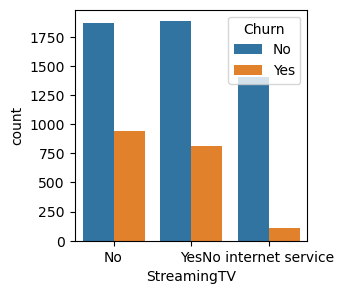

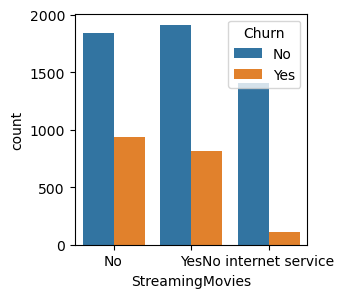

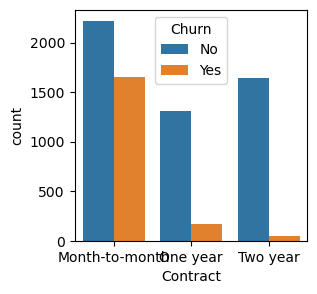

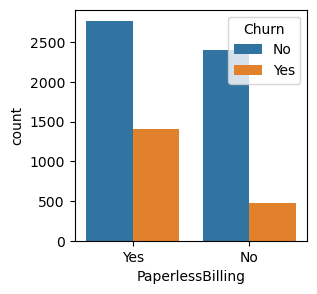

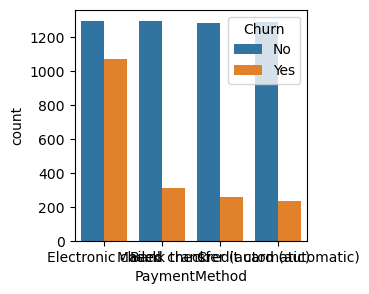

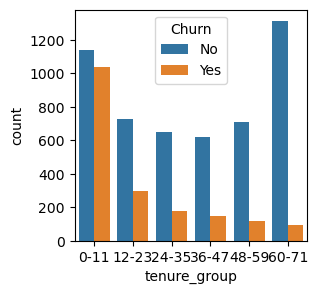

In [33]:
new_list = df.drop(columns=['Churn' , 'TotalCharges' ,  'MonthlyCharges'])
for i , predictor in enumerate(new_list):
    plt.figure(i ,  figsize =(3,3))
    sns.countplot(data = df , x = predictor , hue = 'Churn')
    

# LABEL ENCODING

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 n

In [35]:
#creating a list of all columns where dtype is object
col_object = df.select_dtypes(include = ['object']).columns.tolist() 

In [36]:
col_object

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [37]:
df.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn tenure_group  
0           Electronic check           29.85         29.85    No         0-11  
1               Mailed check           56.95       1889.50    No        24-35  
2               Mailed check           53.85        108.15   Yes         0-11  
3  Bank transfer (automatic)           42.30       1840.75    No        36-47  
4           Electronic check           70.70        151.65   Yes         0-11

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])


In [39]:
df

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0     Female              0     Yes         No           No  No phone service   
1       Male              0      No         No          Yes                No   
2       Male              0      No         No          Yes                No   
3       Male              0      No         No           No  No phone service   
4     Female              0      No         No          Yes                No   
...      ...            ...     ...        ...          ...               ...   
7038    Male              0     Yes        Yes          Yes               Yes   
7039  Female              0     Yes        Yes          Yes               Yes   
7040  Female              0     Yes        Yes           No  No phone service   
7041    Male              1     Yes         No          Yes               Yes   
7042    Male              0      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  Churn  \
0              Electronic check           29.85         29.85      0   
1                  Mailed check           56.95       1889.50      0   
2                  Mailed check           53.85        108.15      1   
3     Bank transfer (automatic)           42.30       1840.75      0   
4              Electronic check           70.70        151.65      1   
...                         ...             ...           ...    ...   
7038               Mailed check           84.80       1990.50      0   
7039    Credit card (automatic)          103.20       7362.90      0   
7040           Electronic check           29.60        346.45      0   
7041               Mailed check           74.40        306.60      1   
7042  Bank transfer (automatic)          105.65       6844.50      0   

     tenure_group  
0            0-11  
1           24-35  
2            0-11  
3           36-47  
4            0-11  
...           ...  
7038        12-23  
7039        60-71  
7040         0-11  
7041         0-11  
7042        60-71  

[7032 rows x 20 columns]

In [40]:
df.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  Churn tenure_group  
0           Electronic check           29.85         29.85      0         0-11  
1               Mailed check           56.95       1889.50      0        24-35  
2               Mailed check           53.85        108.15      1         0-11  
3  Bank transfer (automatic)           42.30       1840.75      0        36-47  
4           Electronic check           70.70        151.65      1         0-11

###### since our dataset now has 0,1,2.. in place of object types so we need to make sure that model does not take them as ranks 

##### so we use one hot encoding using dummies

# one hot encoding

# convert all categorical values to dummy values 

In [41]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0           29.85         29.85      0              1   
1              0           56.95       1889.50      0              0   
2              0           53.85        108.15      1              0   
3              0           42.30       1840.75      0              0   
4              0           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0            0           0            1              1               0  ...   
1            1           1            0              1               0  ...   
2            1           1            0              1               0  ...   
3            1           1            0              1               0  ...   
4            0           1            0              1               0  ...   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  tenure_group_0-11  tenure_group_12-23  \
0                           0                  1                   0   
1                           1                  0                   0   
2                           1                  1                   0   
3                           0                  0                   0   
4                           0                  1                   0   

   tenure_group_24-35  tenure_group_36-47  tenure_group_48-59  \
0                   0                   0                   0   
1                   1                   0                   0   
2                   0                   0                   0   
3                   0                   1                   0   
4                   0                   0                   0   

   tenure_group_60-71  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 51 columns]

##### the number of columns has increased as we have used one hot encoding

#### checking the relationship between monthly charges and total charges 

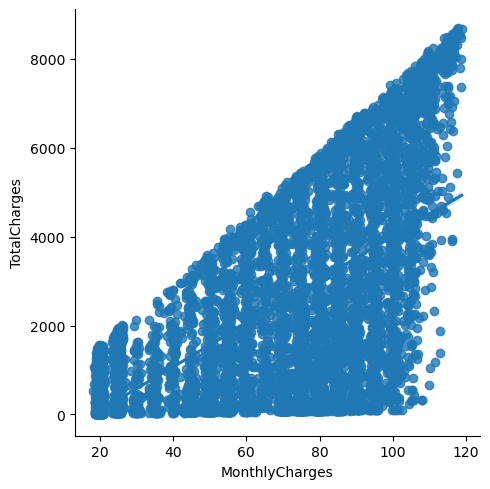

In [42]:
sns.lmplot(x="MonthlyCharges" , y ="TotalCharges" , data = df)

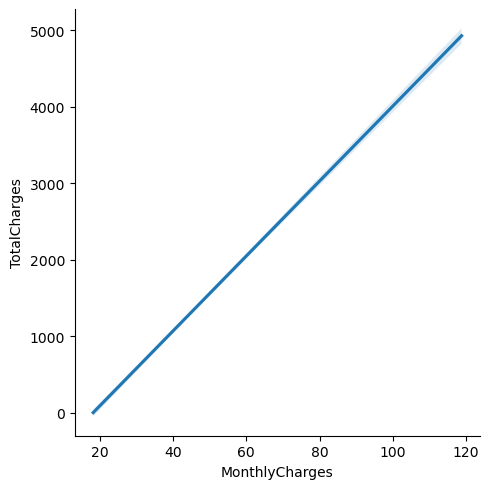

In [43]:
sns.lmplot(x='MonthlyCharges'  , y = 'TotalCharges' , data= df , scatter = False)

#### This shows that monthly charges and total charges have a positive linear relationship .

#### using KDE to get insights of churn and monthly charges 

C:\Users\Shagun Gupta\AppData\Local\Temp\ipykernel_9568\581253971.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  c_t = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==0)] , color = 'Blue' , shade =True)
C:\Users\Shagun Gupta\AppData\Local\Temp\ipykernel_9568\581253971.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  c_t = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==1)] , color = 'Green' , shade = True )


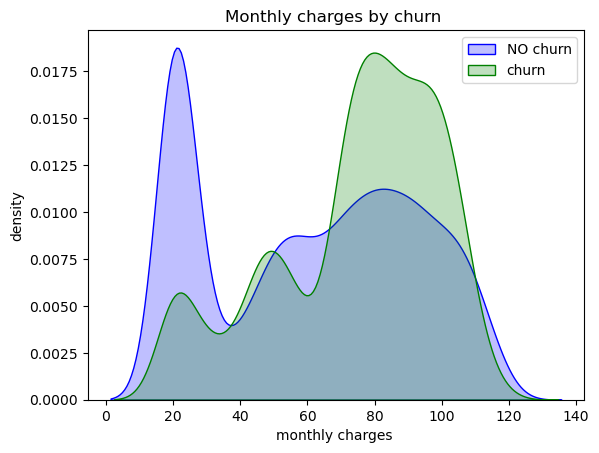

In [44]:
c_t = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==0)] , color = 'Blue' , shade =True)
c_t = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==1)] , color = 'Green' , shade = True )
c_t.legend(["NO churn"  ,'churn'] )
c_t.set_ylabel('density')
c_t.set_xlabel("monthly charges ")
c_t.set_title("Monthly charges by churn ")
plt.show()

#### churn is high when monthly charges is high 

###### corelation of all the predictors with churn 

In [45]:
df_dummies

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0                 0           29.85         29.85      0              1   
1                 0           56.95       1889.50      0              0   
2                 0           53.85        108.15      1              0   
3                 0           42.30       1840.75      0              0   
4                 0           70.70        151.65      1              1   
...             ...             ...           ...    ...            ...   
7038              0           84.80       1990.50      0              0   
7039              0          103.20       7362.90      0              1   
7040              0           29.60        346.45      0              1   
7041              1           74.40        306.60      1              0   
7042              0          105.65       6844.50      0              0   

      gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0               0           0            1              1               0   
1               1           1            0              1               0   
2               1           1            0              1               0   
3               1           1            0              1               0   
4               0           1            0              1               0   
...           ...         ...          ...            ...             ...   
7038            1           0            1              0               1   
7039            0           0            1              0               1   
7040            0           0            1              0               1   
7041            1           0            1              1               0   
7042            1           1            0              1               0   

      ...  PaymentMethod_Bank transfer (automatic)  \
0     ...                                        0   
1     ...                                        0   
2     ...                                        0   
3     ...                                        1   
4     ...                                        0   
...   ...                                      ...   
7038  ...                                        0   
7039  ...                                        0   
7040  ...                                        0   
7041  ...                                        0   
7042  ...                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7038                                      0                               0   
7039                                      1                               0   
7040                                      0                               1   
7041                                      0                               0   
7042                                      0                               0   

      PaymentMethod_Mailed check  tenure_group_0-11  tenure_group_12-23  \
0                              0                  1                   0   
1                              1                  0                   0   
2                              1                  1                   0   
3                              0                  0                   0   
4                              0                  1                   0   
...                          ...                ...                 ...   
7038                           1                  0      

<Axes: >

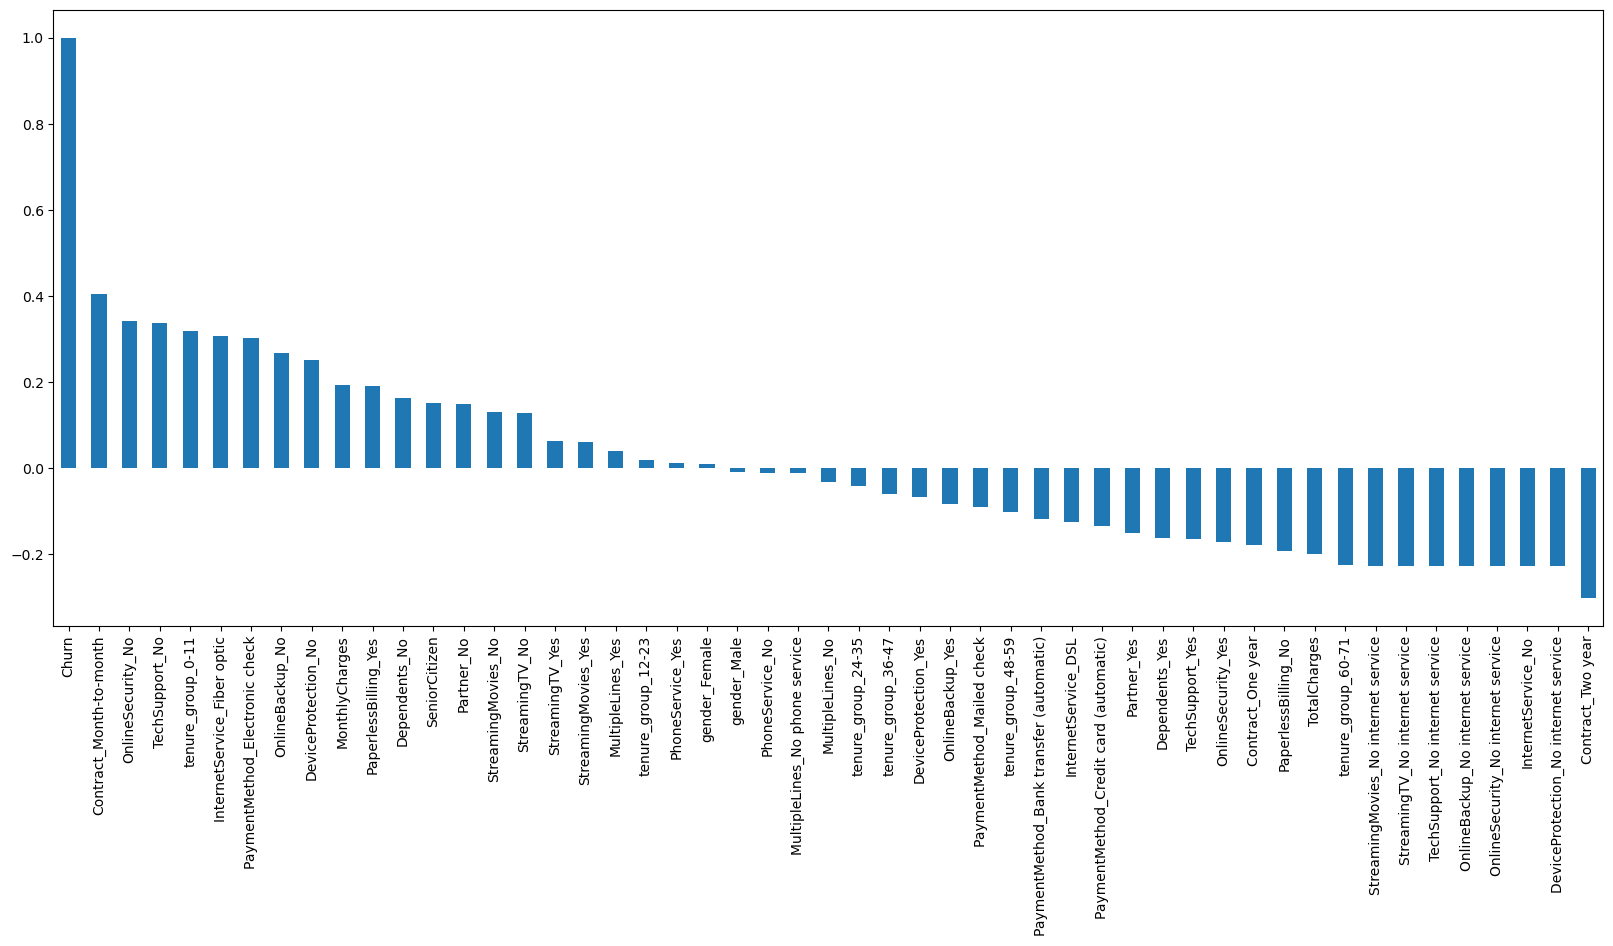

In [46]:
plt.figure(figsize = (20 , 8))
df_dummies.corr()["Churn"].sort_values(ascending = False ).plot(kind = 'bar')

#### correlation between churn and contract month to month is highest i.e 0.4 this means that high churn is seen in case of month to month contracts ,no online security , no tech support , first year of subscription and fibre optics internet . LOW churn is seen in case of long term contracts , subscription without internet service and customers engaged for 5+ years . factors like gender , availability of phone service and number of multiple  lines have almost no impact on churn .
### HEATMAP

<Axes: >

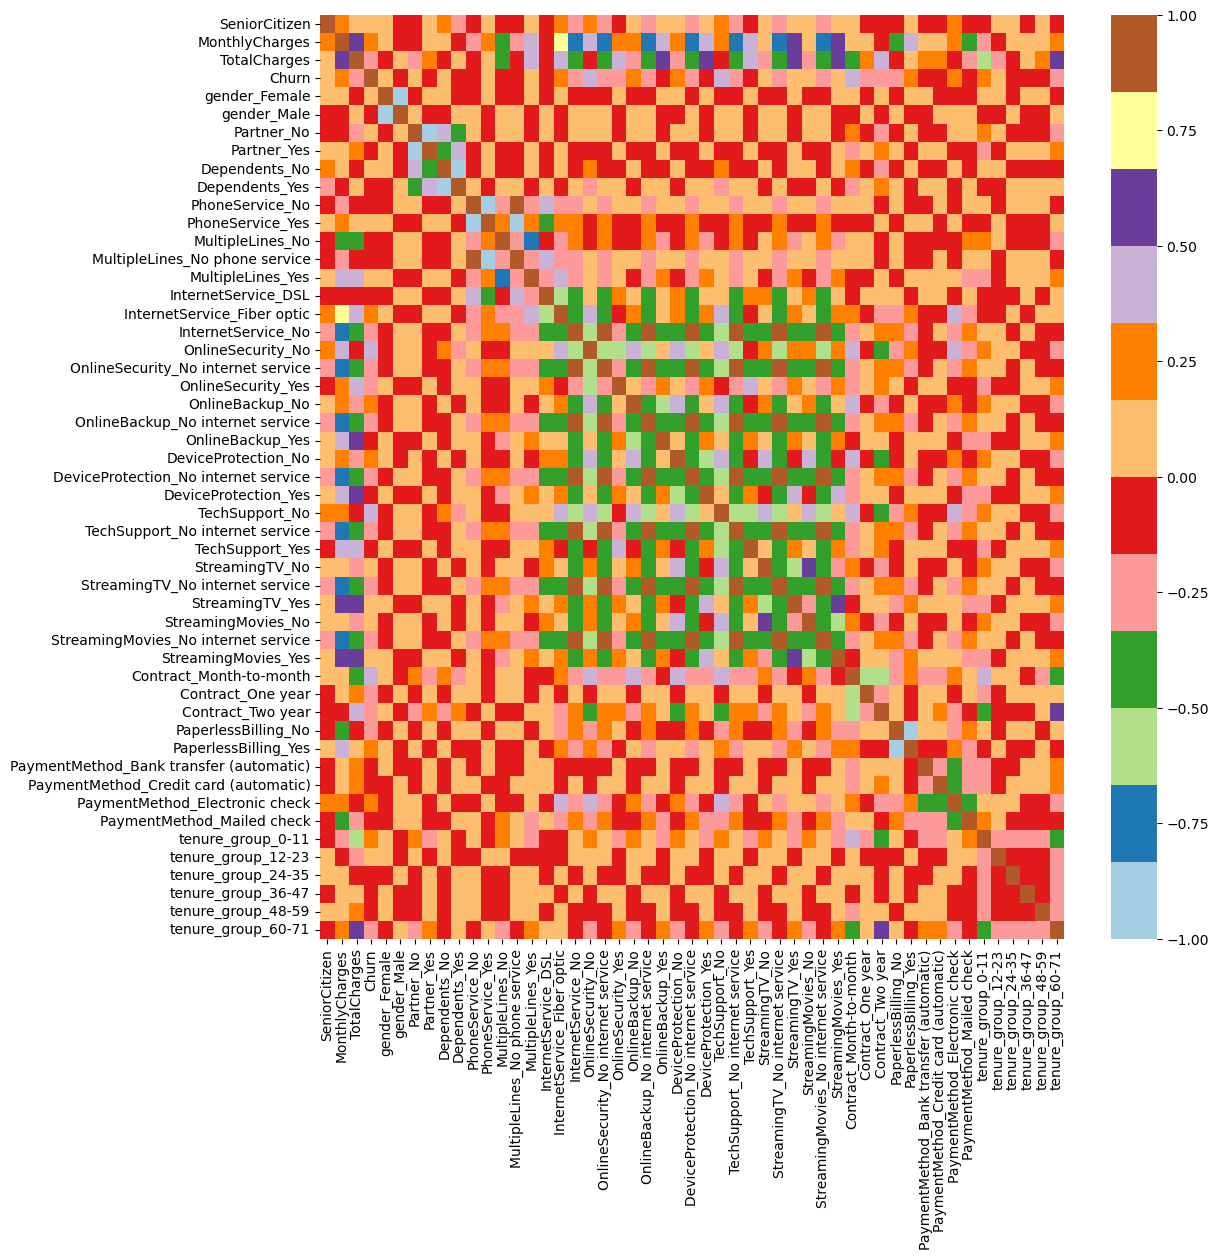

In [47]:
plt.figure(figsize = (12,12))
sns.heatmap(df_dummies.corr() , cmap = 'Paired')

# BIVARIATE ANALYSIS

In [48]:
new_df_target0 = df.loc[df_dummies['Churn']==0]
new_df_target1 = df.loc[df_dummies['Churn']==1]

In [49]:


def uniplot(df, col, title, hue=None):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30
    
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(df[hue].unique()) if hue else len(df[col].unique()) + 7
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale("log")
    plt.title(title)
    
    if hue:
        ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    else:
        ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='bright')
    
    plt.show()


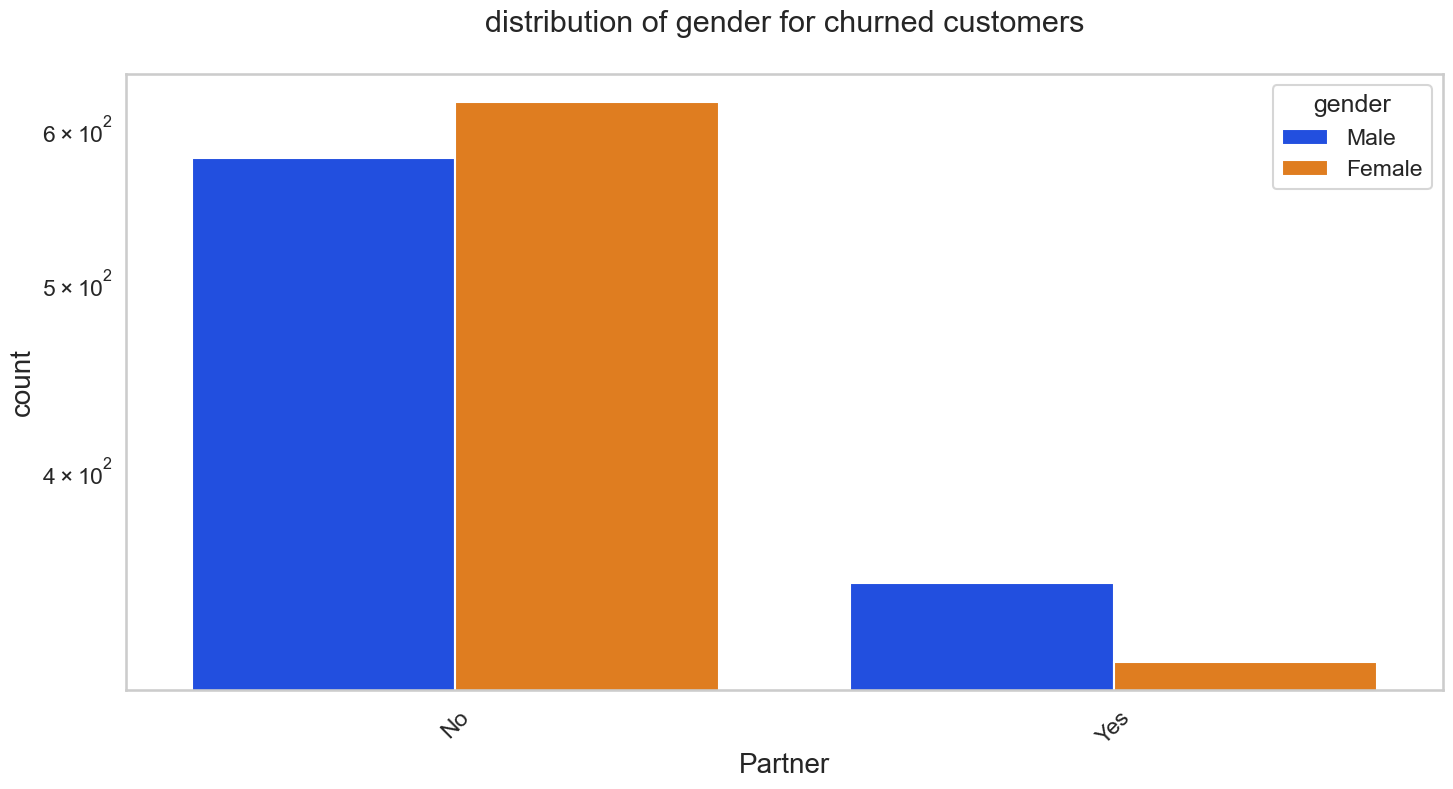

In [50]:
uniplot(new_df_target1 , col='Partner' , title = "distribution of gender for churned customers" , hue = 'gender')

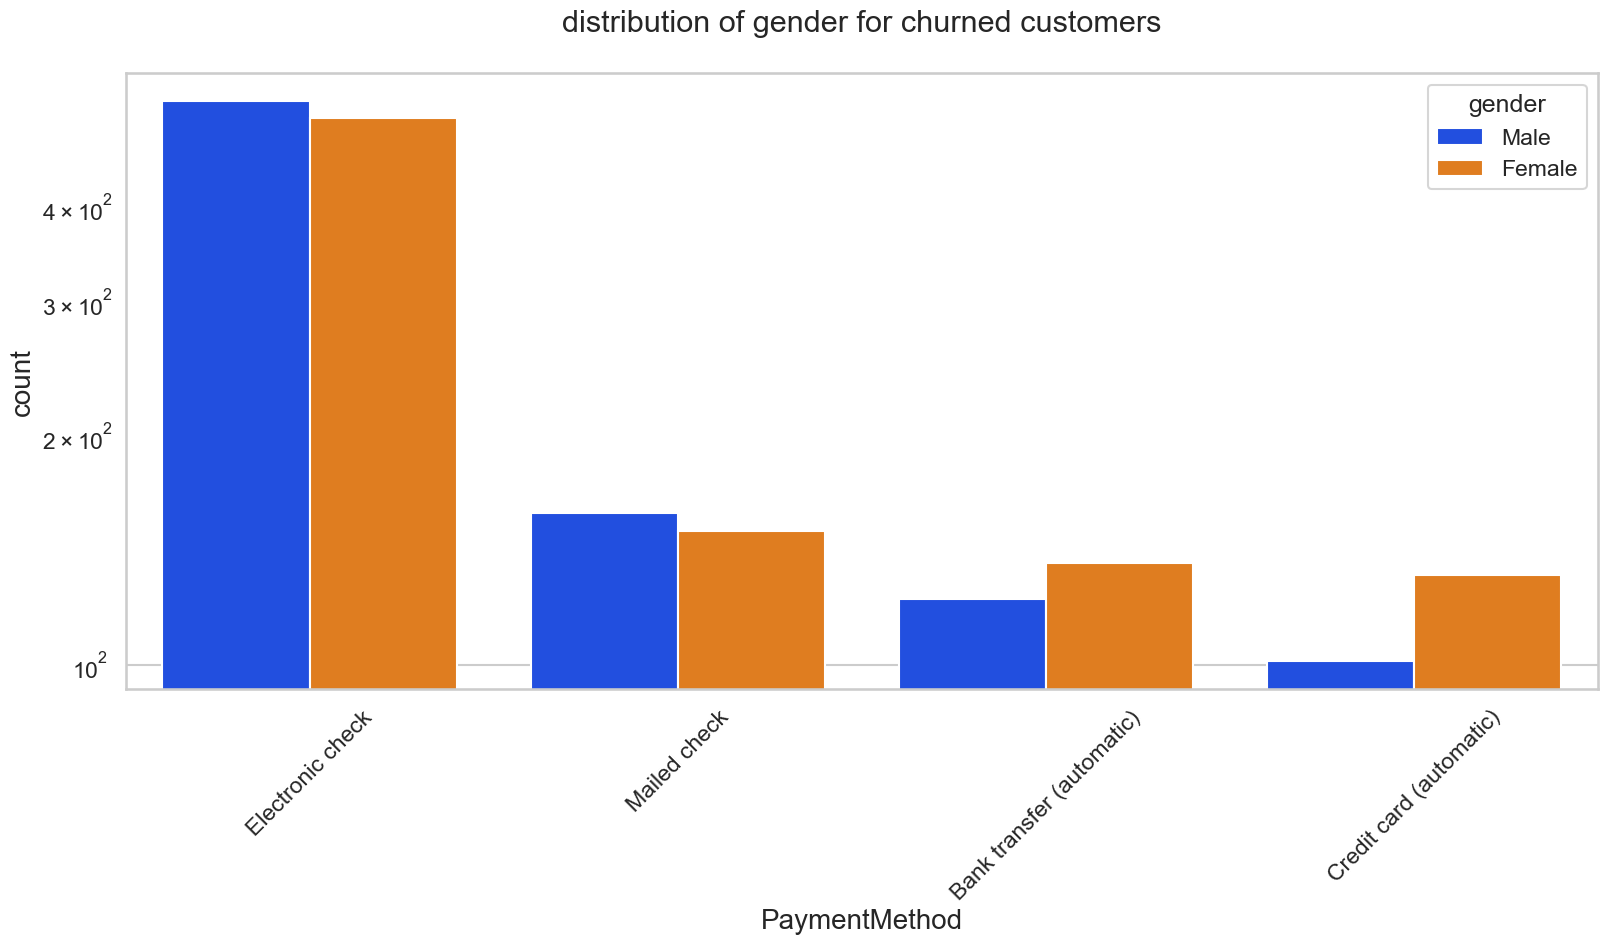

In [51]:
uniplot(new_df_target1 , col='PaymentMethod' , title = "distribution of gender for churned customers" , hue = 'gender')

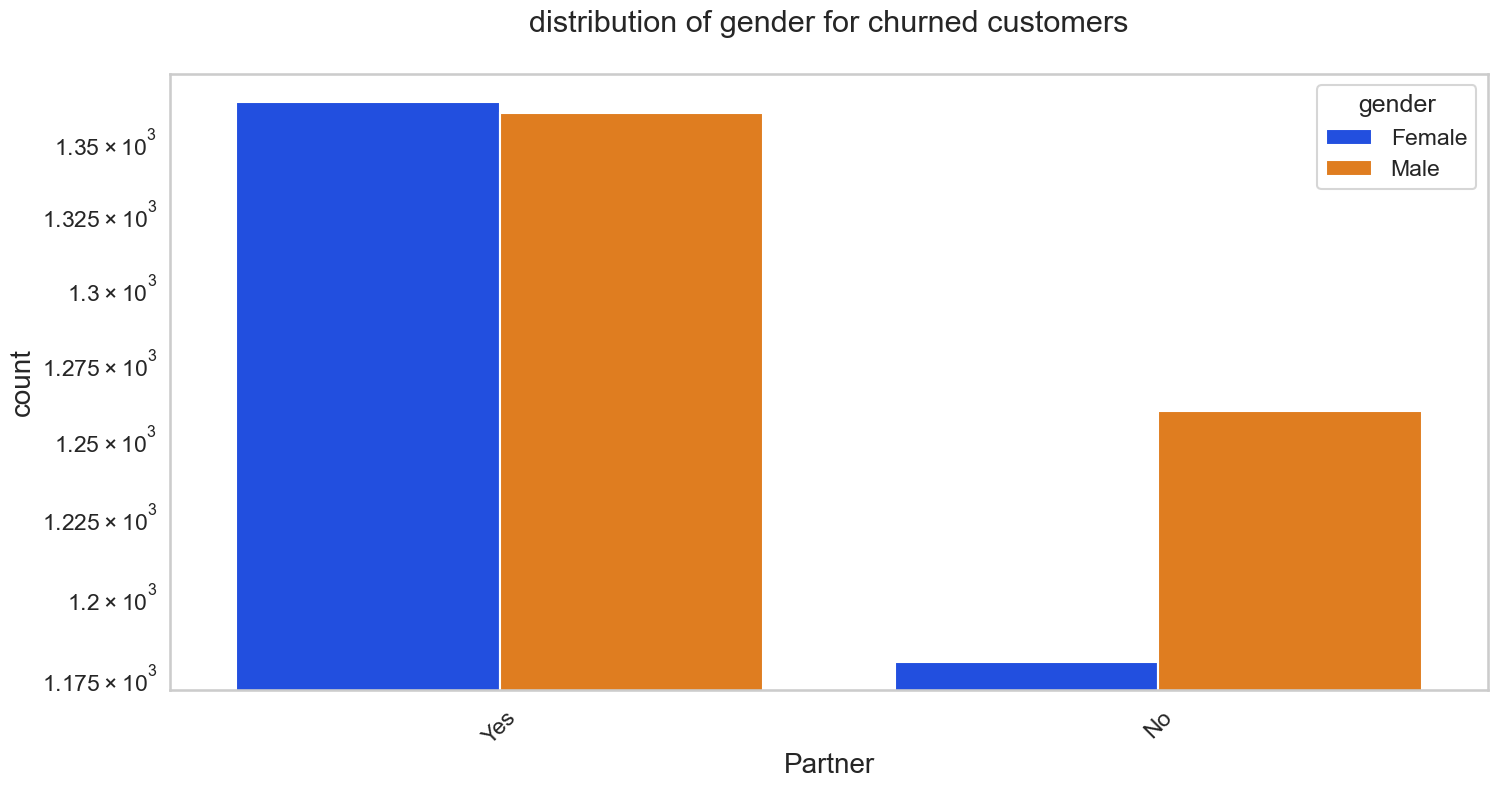

In [52]:
uniplot(new_df_target0 , col='Partner' , title = "distribution of gender for churned customers" , hue = 'gender')

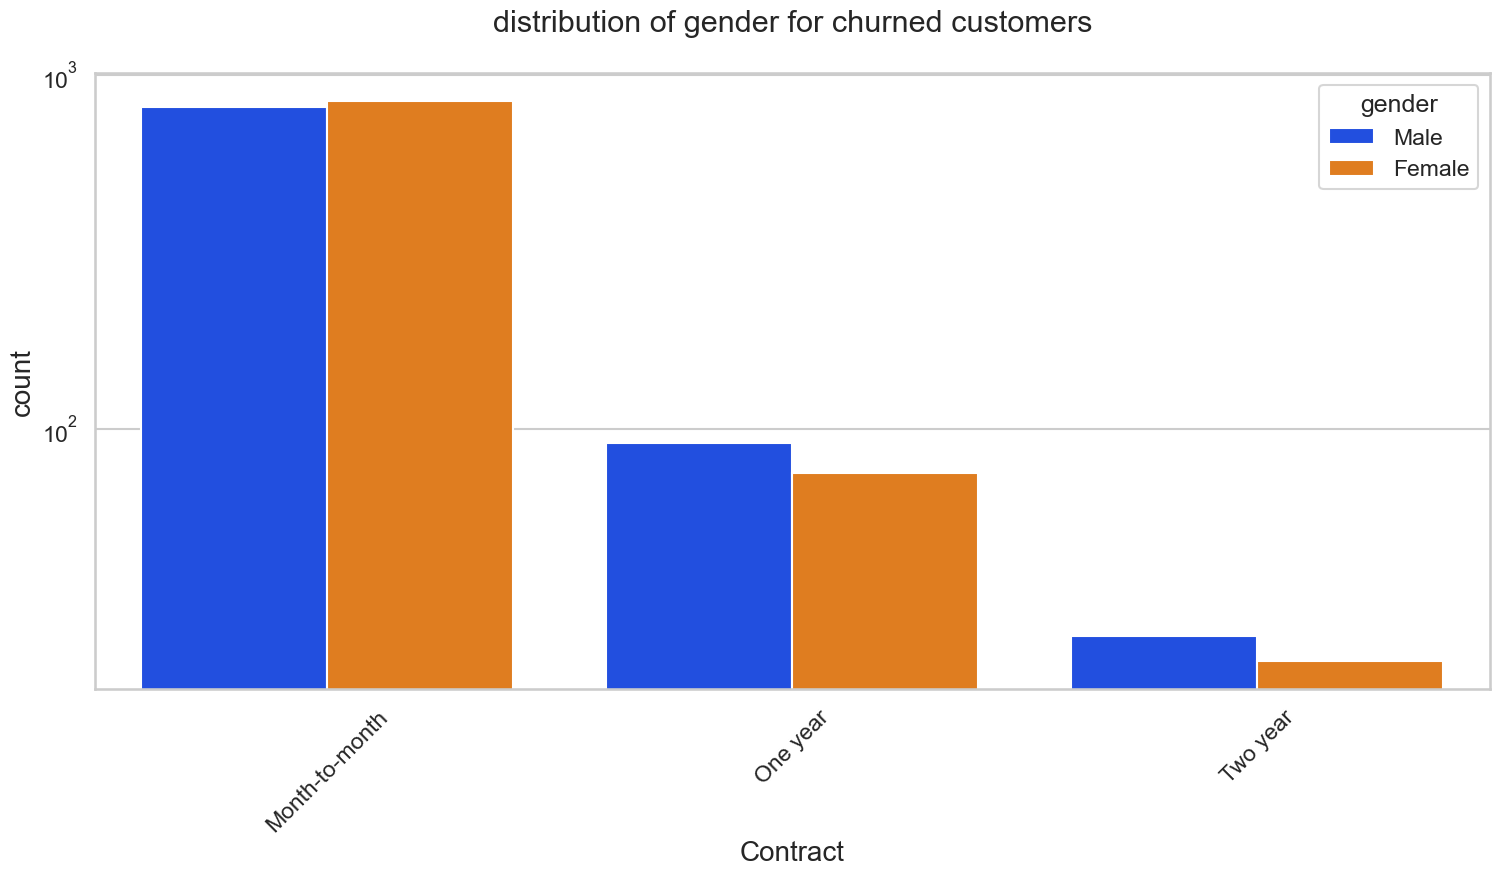

In [53]:
uniplot(new_df_target1 , col='Contract' , title = "distribution of gender for churned customers" , hue = 'gender')

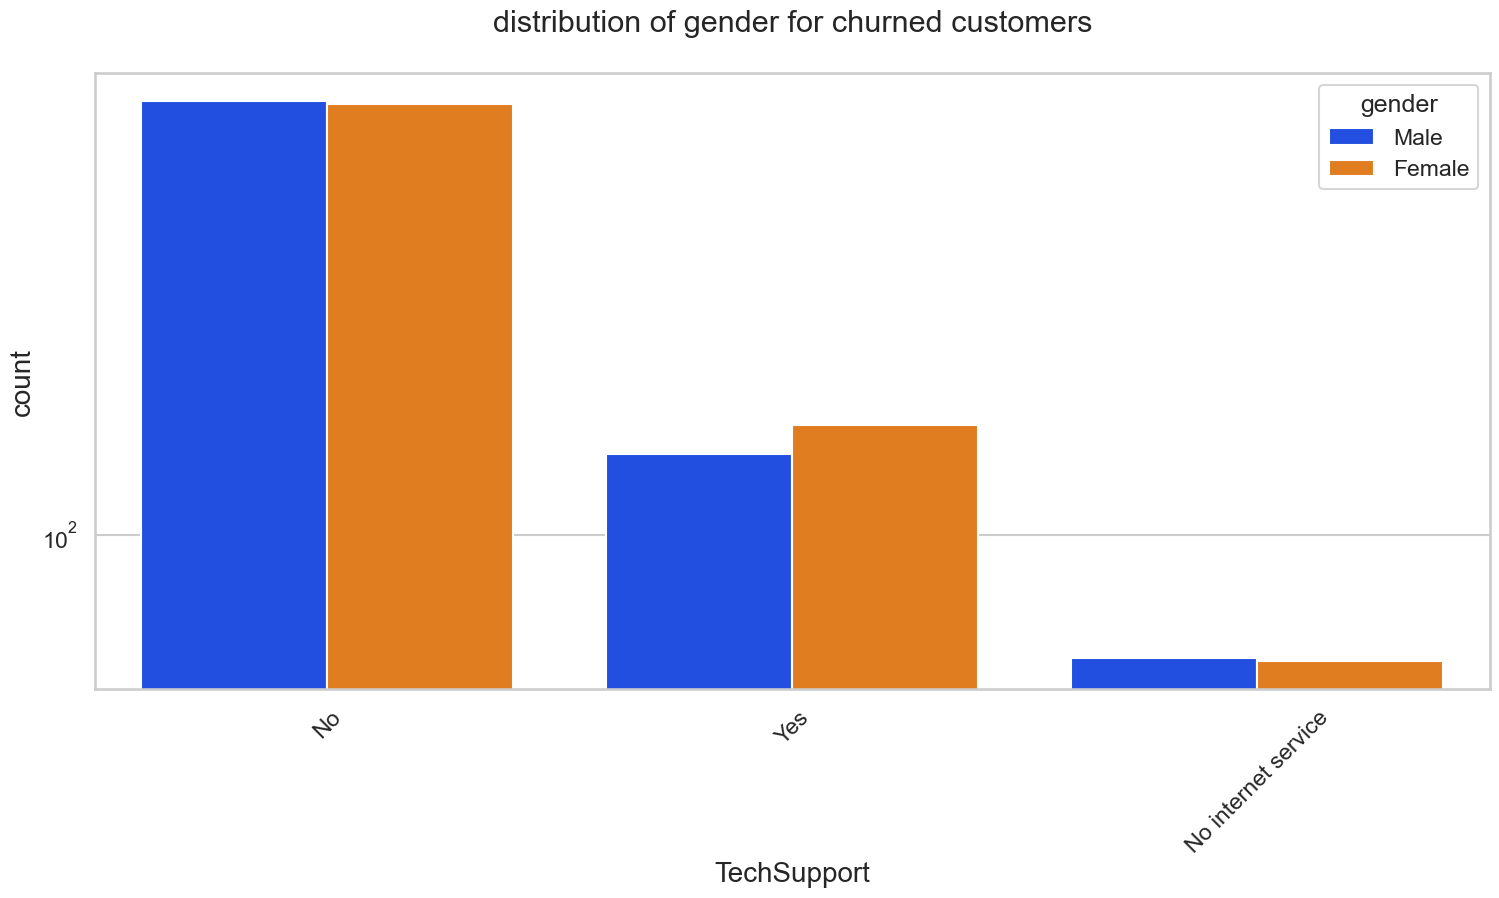

In [54]:
uniplot(new_df_target1 , col='TechSupport' , title = "distribution of gender for churned customers" , hue = 'gender')

### from the above visualizations we get to know that :
#### electronic check medium are the highest churners 
#### month to month contract type customers are more likely to churn 
#### no online security , no tech suppport category are high churners 
#### non senior citizens are high churners 

In [55]:
model_df = df_dummies

# CHURN PREDICTION MODEL  

In [56]:
# creating X and Y variables 
X = model_df.drop("Churn" ,  axis = 1 )

In [57]:
X

SeniorCitizen  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0                 0           29.85         29.85              1            0   
1                 0           56.95       1889.50              0            1   
2                 0           53.85        108.15              0            1   
3                 0           42.30       1840.75              0            1   
4                 0           70.70        151.65              1            0   
...             ...             ...           ...            ...          ...   
7038              0           84.80       1990.50              0            1   
7039              0          103.20       7362.90              1            0   
7040              0           29.60        346.45              1            0   
7041              1           74.40        306.60              0            1   
7042              0          105.65       6844.50              0            1   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0              0            1              1               0                1   
1              1            0              1               0                0   
2              1            0              1               0                0   
3              1            0              1               0                1   
4              1            0              1               0                0   
...          ...          ...            ...             ...              ...   
7038           0            1              0               1                0   
7039           0            1              0               1                0   
7040           0            1              0               1                1   
7041           0            1              1               0                0   
7042           1            0              1               0                0   

      ...  PaymentMethod_Bank transfer (automatic)  \
0     ...                                        0   
1     ...                                        0   
2     ...                                        0   
3     ...                                        1   
4     ...                                        0   
...   ...                                      ...   
7038  ...                                        0   
7039  ...                                        0   
7040  ...                                        0   
7041  ...                                        0   
7042  ...                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7038                                      0                               0   
7039                                      1                               0   
7040                                      0                               1   
7041                                      0                               0   
7042                                      0                               0   

      PaymentMethod_Mailed check  tenure_group_0-11  tenure_group_12-23  \
0                              0                  1                   0   
1                              1                  0                   0   
2                              1                  1                   0   
3                              0                  0                   0   
4                              0                  1                   0   
...         

In [58]:
Y = model_df['Churn']

In [59]:
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

### spliting training and testing data 

In [60]:
#importing the required libraries 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from imblearn.combine import SMOTEENN


In [61]:
x_train_lr , x_test_lr , y_train_lr , y_test_lr = train_test_split(X,Y, test_size = 0.2)

In [62]:
x_train_lr

SeniorCitizen  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
299               0           73.60         73.60              1            0   
1112              1           89.85       6293.45              1            0   
130               0           85.95       1215.65              1            0   
2760              0           20.65        595.50              0            1   
6602              0           96.35       3915.40              1            0   
...             ...             ...           ...            ...          ...   
6262              0           96.75       4442.75              1            0   
2148              0           19.55        128.60              0            1   
4005              0           24.05         24.05              0            1   
3848              0           49.20        103.70              1            0   
5825              1           70.30         70.30              0            1   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
299            1            0              0               1                0   
1112           1            0              1               0                0   
130            1            0              1               0                0   
2760           1            0              1               0                0   
6602           0            1              0               1                0   
...          ...          ...            ...             ...              ...   
6262           1            0              1               0                0   
2148           1            0              0               1                0   
4005           1            0              1               0                0   
3848           1            0              1               0                0   
5825           0            1              1               0                0   

      ...  PaymentMethod_Bank transfer (automatic)  \
299   ...                                        0   
1112  ...                                        0   
130   ...                                        0   
2760  ...                                        0   
6602  ...                                        0   
...   ...                                      ...   
6262  ...                                        1   
2148  ...                                        0   
4005  ...                                        0   
3848  ...                                        0   
5825  ...                                        0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
299                                       0                               0   
1112                                      0                               0   
130                                       0                               1   
2760                                      1                               0   
6602                                      1                               0   
...                                     ...                             ...   
6262                                      0                               0   
2148                                      0                               0   
4005                                      0                               0   
3848                                      0                               0   
5825                                      0                               1   

      PaymentMethod_Mailed check  tenure_group_0-11  tenure_group_12-23  \
299                            1                  1                   0   
1112                           1                  0                   0   
130                            0                  0                   1   
2760                           0                  0                   0   
6602                           0                  0                   0   
...         

#### x_train has 5625 rows which is about 80% of the dataset

In [63]:
y_train_lr.shape   #y_train for the model has 5625 values similar to X_train

(5625,)

In [64]:
y_train_lr

299     1
1112    0
130     0
2760    0
6602    0
       ..
6262    0
2148    0
4005    1
3848    0
5825    1
Name: Churn, Length: 5625, dtype: int32

In [65]:
x_test_lr

SeniorCitizen  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
4554              0          108.20       2203.70              0            1   
5201              0           19.90        164.60              0            1   
1627              0           75.90        866.40              0            1   
5552              0           20.25        488.25              0            1   
5854              0           48.80        720.10              1            0   
...             ...             ...           ...            ...          ...   
2261              0           52.15       2583.75              1            0   
3667              1           96.55       2263.45              1            0   
2916              0           44.45       2181.55              0            1   
1847              0           19.40       1083.00              1            0   
5274              1          108.10       7181.95              1            0   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
4554           1            0              1               0                0   
5201           1            0              1               0                0   
1627           1            0              1               0                0   
5552           0            1              0               1                0   
5854           1            0              1               0                0   
...          ...          ...            ...             ...              ...   
2261           0            1              1               0                0   
3667           0            1              0               1                0   
2916           1            0              1               0                1   
1847           0            1              0               1                0   
5274           0            1              1               0                0   

      ...  PaymentMethod_Bank transfer (automatic)  \
4554  ...                                        1   
5201  ...                                        0   
1627  ...                                        0   
5552  ...                                        1   
5854  ...                                        0   
...   ...                                      ...   
2261  ...                                        0   
3667  ...                                        0   
2916  ...                                        0   
1847  ...                                        0   
5274  ...                                        0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
4554                                      0                               0   
5201                                      0                               1   
1627                                      0                               0   
5552                                      0                               0   
5854                                      0                               0   
...                                     ...                             ...   
2261                                      1                               0   
3667                                      0                               1   
2916                                      1                               0   
1847                                      1                               0   
5274                                      1                               0   

      PaymentMethod_Mailed check  tenure_group_0-11  tenure_group_12-23  \
4554                           0                  0                   1   
5201                           0                  1                   0   
1627                           1                  1                   0   
5552                           0                  0                   1   
5854                           1                  0                   1   
...         

In [66]:
y_test_lr

4554    0
5201    0
1627    0
5552    0
5854    0
       ..
2261    0
3667    0
2916    0
1847    0
5274    0
Name: Churn, Length: 1407, dtype: int32

In [67]:
y_test_lr.shape

(1407,)

##### testing data set has 1407 rows which is about 20% of data

# LOGISTIC REGRESSION 

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
rg = LogisticRegression()

In [70]:
model_rg =rg.fit(x_train_lr , y_train_lr)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
y_pred_lr = model_rg.predict(x_test_lr) 

In [72]:
accuracy_score(y_test_lr , y_pred_lr)

NameError: name 'accuracy_score' is not defined

In [ ]:
print(classification_report(y_test_lr , y_pred_lr))

In [73]:
confusion_matrix(y_test_lr , y_pred_lr)

array([[942,  85],
       [198, 182]], dtype=int64)

<Axes: >

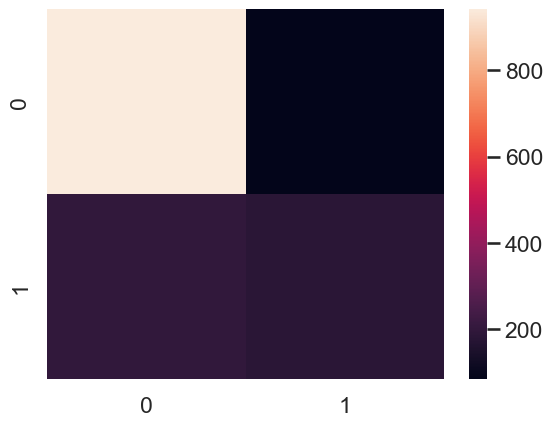

In [74]:
sns.heatmap(confusion_matrix(y_test_lr , y_pred_lr))

### ACCURACY is around 79% which is a little less

# DECISION TREE 

In [75]:
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size = 0.2)

In [76]:
model_dt = DecisionTreeClassifier(criterion ='gini' , random_state = 100 , max_depth=6 , min_samples_leaf = 8)

##### we are using gini index as the criterion of selecting nodes 
##### we took a small max_depth to avoid overfitting

In [77]:
model_dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [78]:
y_pred = model_dt.predict(x_test)

In [79]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

## confusion matrix

In [80]:
confusion_matrix(y_test , y_pred)

array([[909, 121],
       [173, 204]], dtype=int64)

In [81]:
tn , fp , fn , tp = confusion_matrix(y_test , y_pred).ravel()

In [82]:
tn , fp, fn , tp

(909, 121, 173, 204)

Text(0.5, 1.0, 'confusion matrix heatmap')

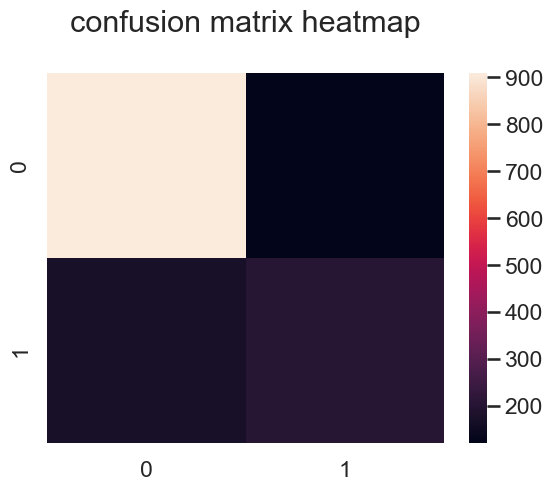

In [83]:
sns.heatmap(confusion_matrix(y_test , y_pred))
plt.title("confusion matrix heatmap")

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(y_test , y_pred)

0.7910447761194029

### the accuracy sore of decision tree is 0.8002

In [86]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1030
           1       0.63      0.54      0.58       377

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



### the accuracy is less and dataset is imbalanced 

 ### using SMOTEENN for upsampling or downsampling 

In [87]:
sm = SMOTEENN()
X_resampled , Y_resampled = sm.fit_resample(X,Y)

In [88]:
xr_train , xr_test , yr_train , yr_test  = train_test_split(X_resampled , Y_resampled , test_size = 0.2) 

In [89]:
model_dt_sm = DecisionTreeClassifier(criterion ='gini' , random_state = 100 , max_depth=6 , min_samples_leaf = 8)

In [90]:
model_dt_sm.fit(xr_train , yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [91]:
yr_pred =model_dt_sm.predict(xr_test)

In [92]:
confusion_matrix(yr_test , yr_pred)

array([[465,  54],
       [ 33, 629]], dtype=int64)

<Axes: >

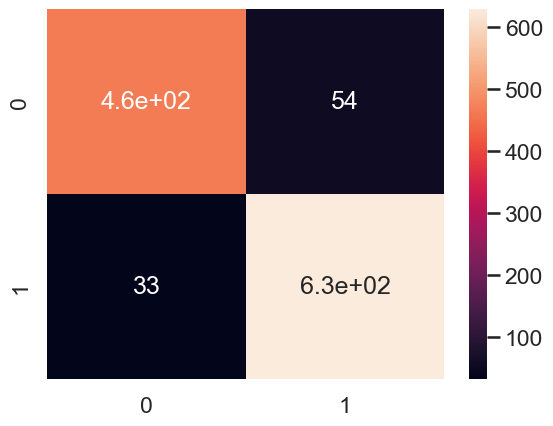

In [93]:
sns.heatmap(confusion_matrix(yr_test , yr_pred) , annot=True)

#### DECISION TREE FIGURE:

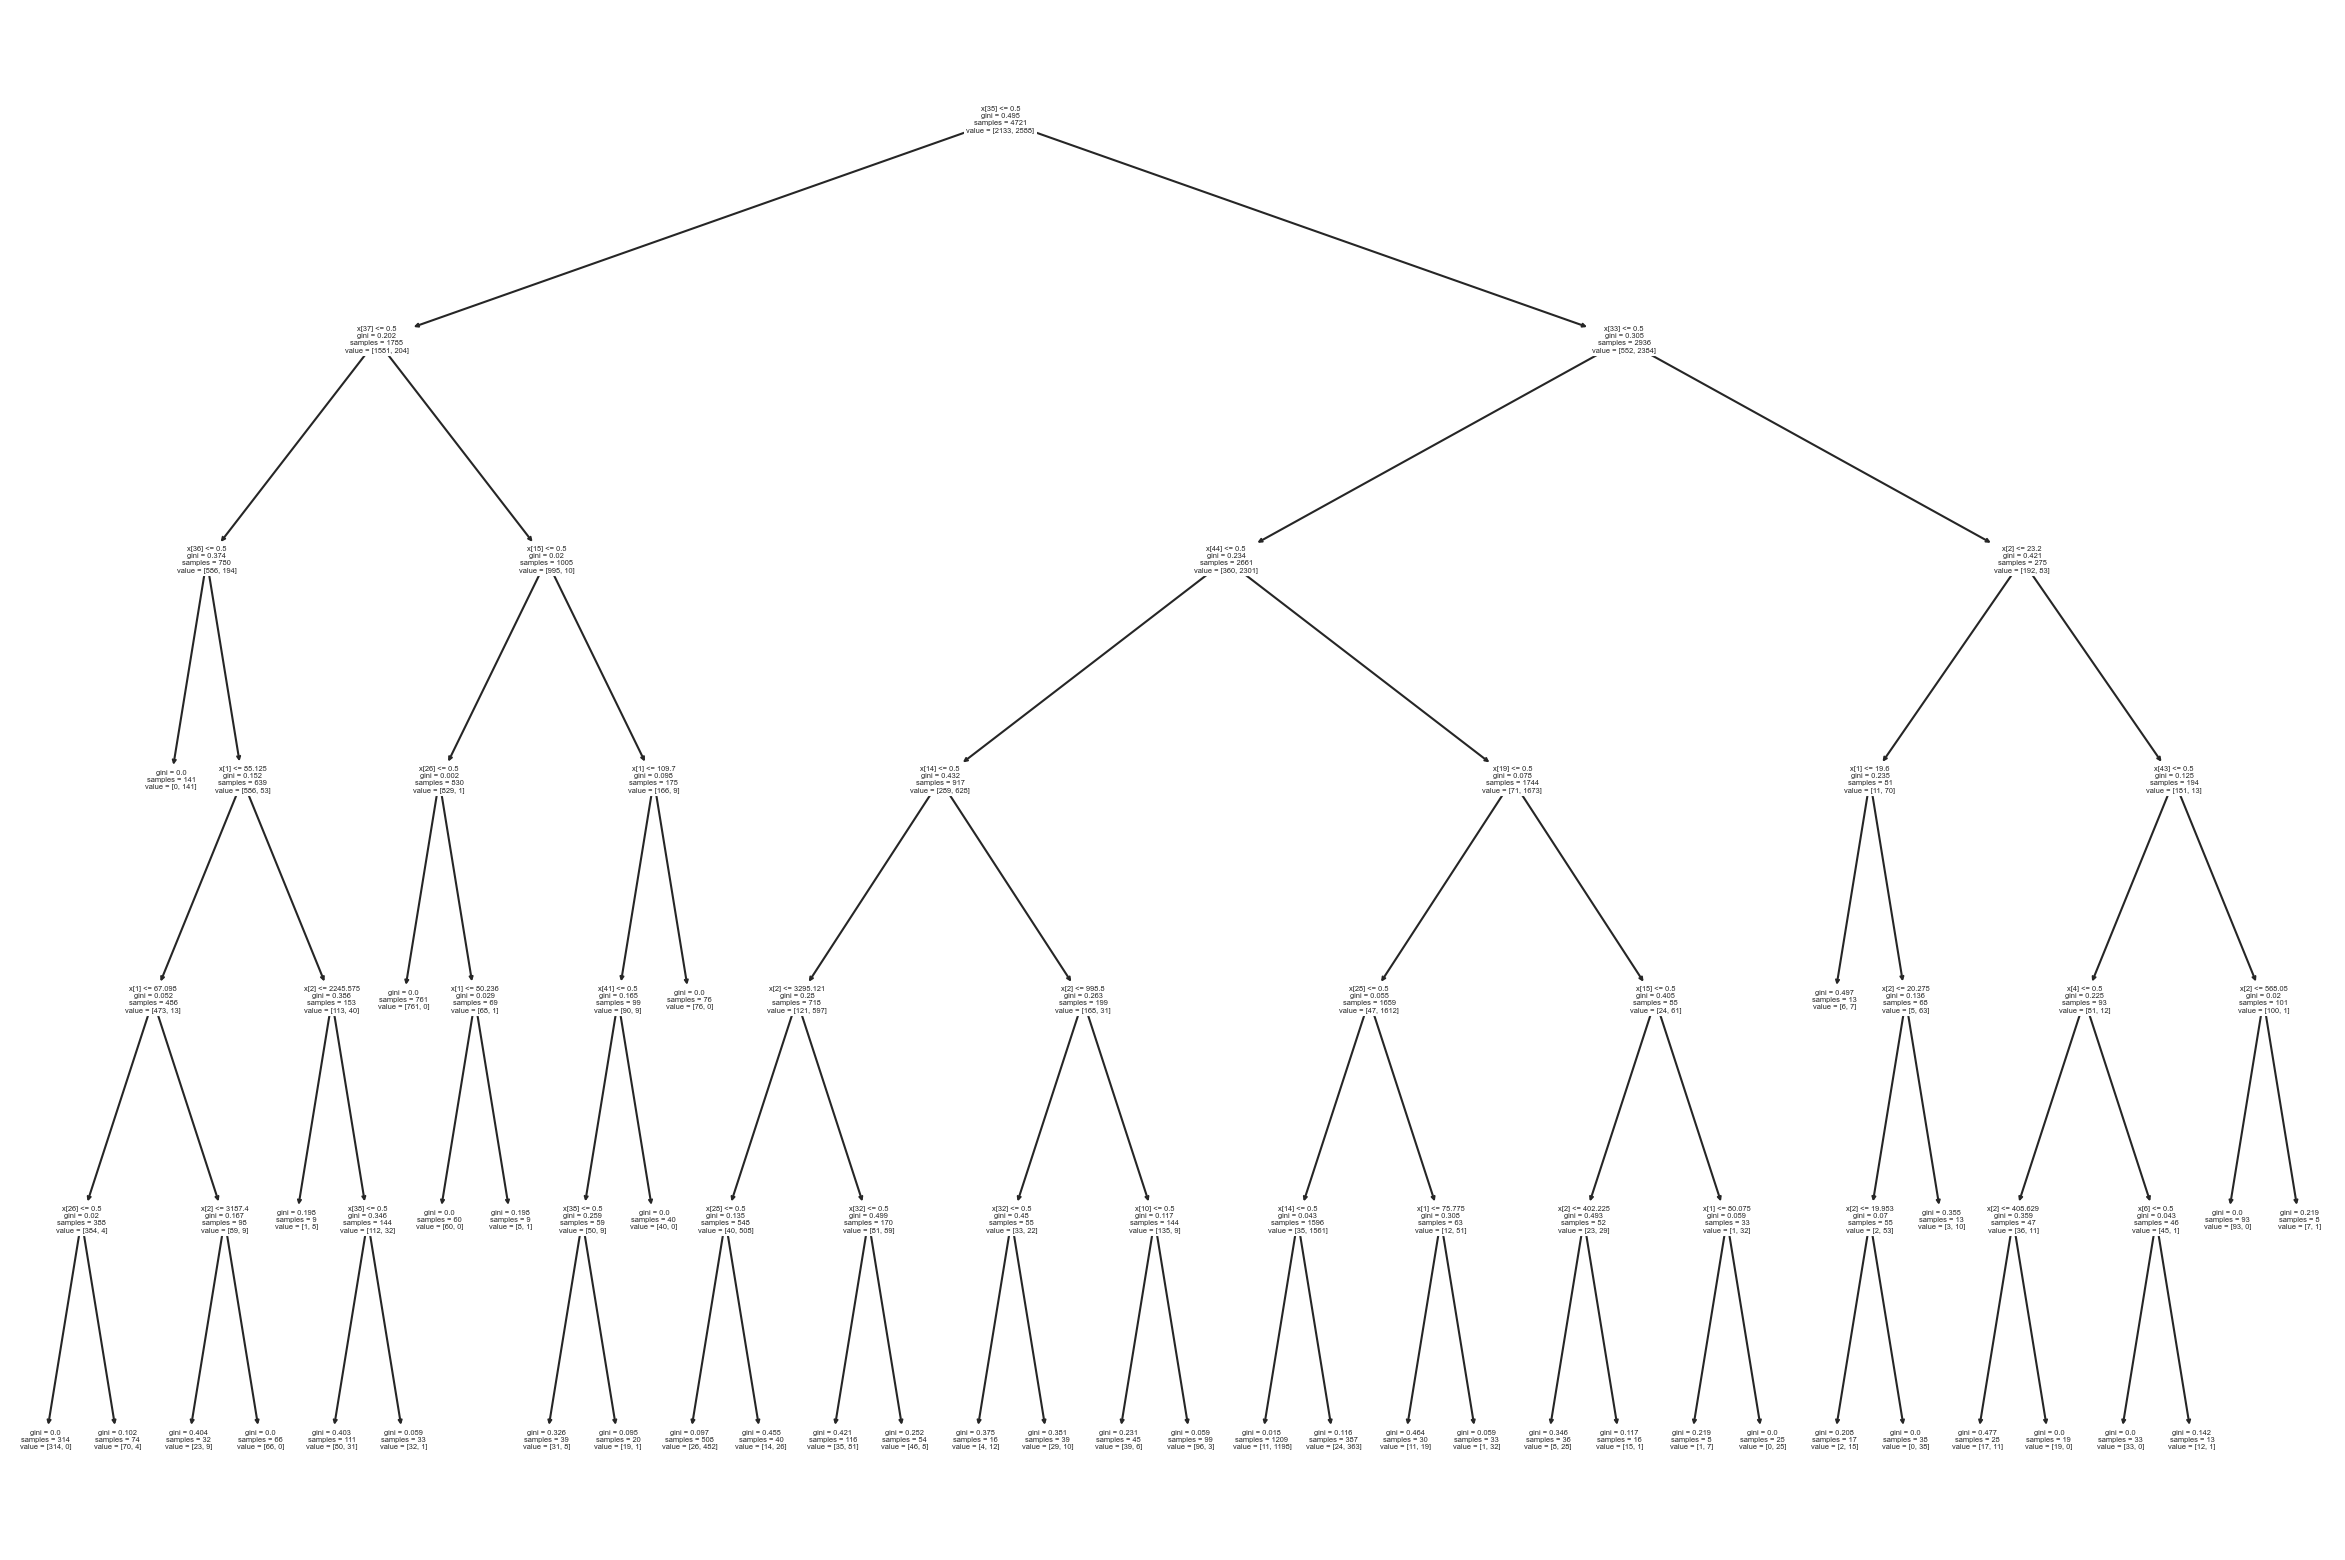

In [94]:
plt.figure(figsize = (30,20))
from sklearn import tree
tree.plot_tree(model_dt_sm)
plt.show()

In [95]:
accuracy_score(yr_test , yr_pred )

0.9263336155800169

In [96]:
print(classification_report(yr_test , yr_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       519
           1       0.92      0.95      0.94       662

    accuracy                           0.93      1181
   macro avg       0.93      0.92      0.92      1181
weighted avg       0.93      0.93      0.93      1181



## the accuracy of our model is around 92.3011% which is pretty good 

# RANDOM FOREST CLASSIFIER

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
model_rf = RandomForestClassifier(n_estimators = 100 , criterion ='gini' , random_state = 50 , max_depth = 6 , min_samples_leaf = 8 )


In [99]:
model_rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=50)

In [100]:
y_pred_rf = model_rf.predict(x_test)

In [101]:
confusion_matrix(y_test , y_pred_rf)

array([[955,  75],
       [203, 174]], dtype=int64)

In [102]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1030
           1       0.70      0.46      0.56       377

    accuracy                           0.80      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [103]:
accuracy_score(y_test , y_pred_rf)

0.8024164889836531

#### accuracy is only 80% 

## using SWOTEENN to balance the data 

In [104]:
sm = SMOTEENN()
X_resampled_rf , Y_resampled_rf = sm.fit_resample(X,Y)

In [105]:
x_train_rf , x_test_rf , y_train_rf , y_test_rf = train_test_split(X_resampled_rf , Y_resampled_rf ,  test_size = 0.2  )

In [106]:
model_rf_sm = RandomForestClassifier(n_estimators = 100 , criterion ='gini' , random_state = 50 , max_depth = 6 , min_samples_leaf = 8 ) 

In [107]:
model_rf_sm.fit(x_train_rf , y_train_rf)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=50)

In [108]:
y_pred_rf_sm = model_rf_sm.predict(x_test_rf )

In [109]:
confusion_matrix(y_test_rf,y_pred_rf_sm) 

array([[479,  45],
       [ 34, 610]], dtype=int64)

<Axes: >

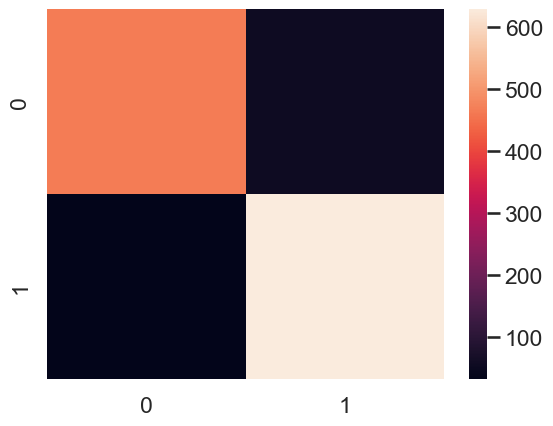

In [110]:
sns.heatmap(confusion_matrix(yr_test , yr_pred) )

In [111]:
accuracy_score(y_test_rf,y_pred_rf_sm)

0.9323630136986302

In [112]:
print(classification_report(y_test_rf , y_pred_rf_sm))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       524
           1       0.93      0.95      0.94       644

    accuracy                           0.93      1168
   macro avg       0.93      0.93      0.93      1168
weighted avg       0.93      0.93      0.93      1168



## ACCURACY is around 94% which very good  

## on comparing we conclude RANDOM FOREST CLASSIFIER MODEL has given best accuracy

#### SAVING AND LOADING MODEL

In [113]:
import pickle 

In [114]:
filename = "model.sav"

In [115]:
pickle.dump(model_rf_sm , open(filename  , 'wb'))

In [116]:
load_model = pickle.load(open(filename , 'rb'))
load_model.score(xr_test , yr_test)

0.9195596951735817

### deployment

# CHURN CUSTOMER ANALYSIS
## PROJECT BY SHAGUN GUPTA

In [1]:
#IMPORT REQUIRED LIBRARIES 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
#read the csv file 
my_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn[1].csv")

In [3]:
#print first 5 rows of the dataset 
my_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
#to check total number of rows and columns in dataset
my_data.shape

(7043, 21)

In [5]:
#check the columns in the data set 
my_data.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# checking the data types of all the columns 
my_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#checking the descriptive statistics (of columns without object data types )
my_data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [8]:
# ANALYSING THE TARGET VARIABLE 
my_data["Churn"].value_counts()



No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Target variable count')

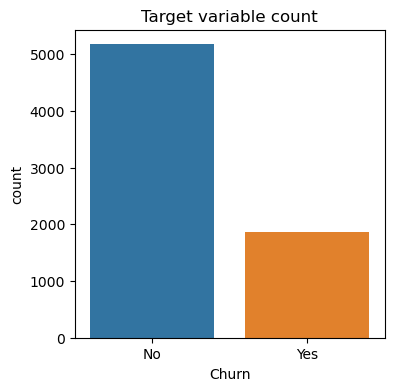

In [9]:
plt.figure(figsize = (4,4))
sns.countplot(x = my_data["Churn"])
plt.title("Target variable count")


In [10]:
my_data["Churn"].value_counts()/len(my_data["Churn"])

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

#### data is imbalanced :  ratio is 73:26

In [11]:
# check the consice summary of data and non null values 
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#checking for null and missing values 
my_data.isnull()


customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False           False  ...   
1            False          False            False           False  ...   
2            False          False            False           False  ...   
3            False          False            False           False  ...   
4            False          False            False           False  ...   
...            ...            ...              ...             ...  ...   
7038         False          False            False           False  ...   
7039         False          False            False           False  ...   
7040         False          False            False           False  ...   
7041         False          False            False           False  ...   
7042         False          False            False           False  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                False        False        False            False     False   
1                False        False        False            False     False   
2                False        False        False            False     False   
3                False        False        False            False     False   
4                False        False        False            False     False   
...                ...          ...          ...              ...       ...   
7038             False        False        False            False     False   
7039             False        False        False            False     False   
7040             False        False        False            False     False   
7041             False        False        False            False     False   
7042             False        False        False            False     False   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                False          False           False         False  False  
1                False          False           False         False  False  
2                False          False           False         False  False  
3                False          False           False         False  False  
4                False          False           False         False  False  
...                ...            ...             ...           ...    ...  
7038             False          False           False         False  False  
7039             False          False           False         False  False  
7040             False          False           False         False  False  
7041             False          False           False         False  False  
7042             False          False           False         False  False  

[7043 rows x 21 columns]

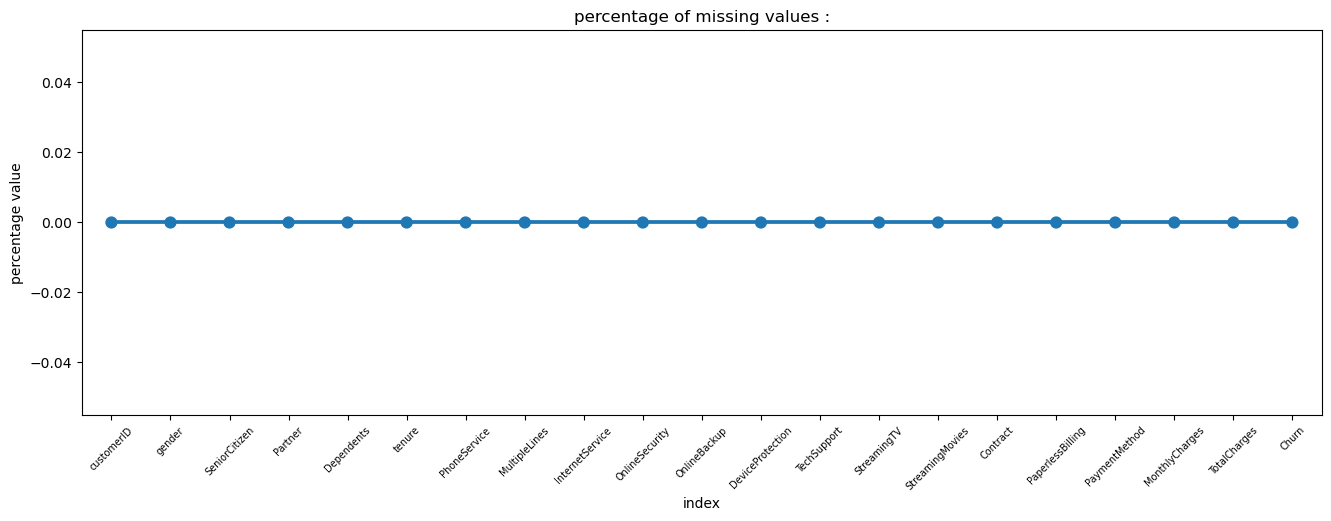

In [13]:
#checking the percentage of missing values in every coloumn
missing= pd.DataFrame((my_data.isnull().sum())*100/my_data.shape[0]).reset_index()
plt.figure(figsize = (16 ,  5 ))
g = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=45 , fontsize = 7 )
plt.title("percentage of missing values :")
plt.ylabel("percentage value")
plt.show()

In [14]:
my_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### There are no null or missing values in data 

In [15]:
my_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [16]:
my_data.duplicated().sum()

0

##### no duplicacy in the dataset 

In [17]:
my_data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

# Data cleaning 

In [18]:
my_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
##### since total charges holds numeric values but its dtype is object we need to do convert to numeric

In [20]:
#creating a copy of dataset
df = my_data.copy()

In [21]:
df.TotalCharges = pd.to_numeric(df.TotalCharges , errors='coerce')


In [22]:
df


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

In [23]:
#now check again for missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

###### now we see TotalCharges has 11 missing values 

In [24]:
#getting the rows with nulll values of totalcharges
df.loc[df['TotalCharges'].isnull()==True]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

###### since the number of null records is very low (11) as compared to whole dataset we can ignore these records 

In [25]:
#drop missing values 
df.dropna(how = 'any' , inplace = True)

In [26]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7032 rows x 21 columns]

###### now we have 7032 rows . initially we had 7043 rows that means missing value rows have been removed  

##### Dividing customers into bins based on tenure...like 1-2years..this will let us know which group is more likely to churn

In [27]:
# moximum tenure is ...
df['tenure'].max()

72

In [28]:
labels = ['{0}-{1}'.format(i , i+11) for i in range(0,72,12)]
df["tenure_group"] = pd.cut(df.tenure , range(1,80,12)  , right = False , labels = labels )  

In [29]:
df['tenure_group'].value_counts()

0-11     2175
60-71    1407
12-23    1024
24-35     832
48-59     832
36-47     762
Name: tenure_group, dtype: int64

In [30]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No          No              No  Month-to-month              Yes   
1             No          No              No        One year               No   
2             No          No              No  Month-to-month              Yes   
3            Yes          No              No        One year               No   
4             No          No              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7038         Yes         Yes             Yes        One year              Yes   
7039          No         Yes             Yes        One year              Yes   
7040          No          No              No  Month-to-month              Yes   
7041          No          No              No  Month-to-month              Yes   
7042         Yes         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  \
0              Electronic check          29.85        29.85     No   
1                  Mailed check          56.95      1889.50     No   
2                  Mailed check          53.85       108.15    Yes   
3     Bank transfer (automatic)          42.30      1840.75     No   
4              Electronic check          70.70       151.65    Yes   
...                         ...            ...          ...    ...   
7038               Mailed check          84.80      1990.50     No   
7039    Credit card (automatic)         103.20      7362.90     No   
7040           Electronic check          29.60       346.45     No   
7041               Mailed check          74.40       306.60    Yes   
7042  Bank transfer (automatic)         105.65      6844.50     No   

      tenure_group  
0             0-11  
1            24-35  
2             0-11  
3            36-47  
4             0-11  
...            ...  
7038         12-23  
7039         60-71  
7040          0-11  
7041          0-11  
7042         60-71  

[7032 rows x 22 columns]

##### a new column tenure_group is created (tenure bins )

#### removing unneccessary columns 

##### customerID has no impact on churn and we already have tenure_group so remove tenure 

In [31]:
#dropping coluns customerID and tenure 
df.drop(columns = ['customerID'  ,'tenure'] , axis=1 , inplace = True )

In [32]:
df

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0     Female              0     Yes         No           No  No phone service   
1       Male              0      No         No          Yes                No   
2       Male              0      No         No          Yes                No   
3       Male              0      No         No           No  No phone service   
4     Female              0      No         No          Yes                No   
...      ...            ...     ...        ...          ...               ...   
7038    Male              0     Yes        Yes          Yes               Yes   
7039  Female              0     Yes        Yes          Yes               Yes   
7040  Female              0     Yes        Yes           No  No phone service   
7041    Male              1     Yes         No          Yes               Yes   
7042    Male              0      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  \
0              Electronic check           29.85         29.85    No   
1                  Mailed check           56.95       1889.50    No   
2                  Mailed check           53.85        108.15   Yes   
3     Bank transfer (automatic)           42.30       1840.75    No   
4              Electronic check           70.70        151.65   Yes   
...                         ...             ...           ...   ...   
7038               Mailed check           84.80       1990.50    No   
7039    Credit card (automatic)          103.20       7362.90    No   
7040           Electronic check           29.60        346.45    No   
7041               Mailed check           74.40        306.60   Yes   
7042  Bank transfer (automatic)          105.65       6844.50    No   

     tenure_group  
0            0-11  
1           24-35  
2            0-11  
3           36-47  
4            0-11  
...           ...  
7038        12-23  
7039        60-71  
7040         0-11  
7041         0-11  
7042        60-71  

[7032 rows x 20 columns]

# Data vizualization and exploration

## Univariate Analysis 

##### 1 . plot distribution of individual predictors by churn

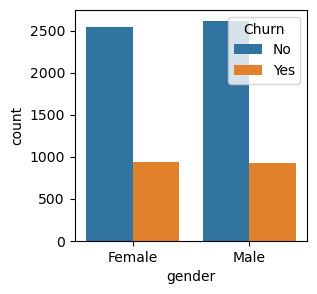

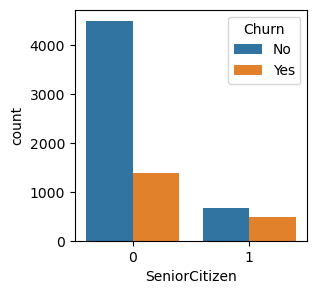

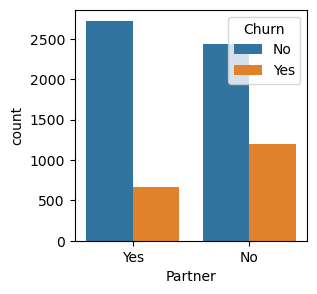

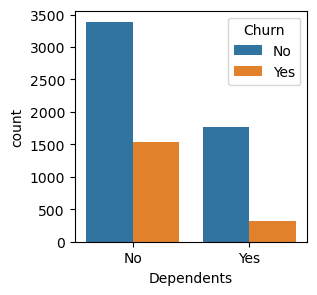

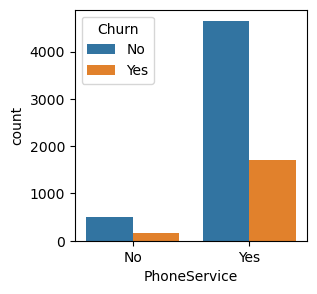

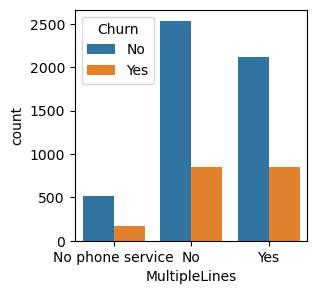

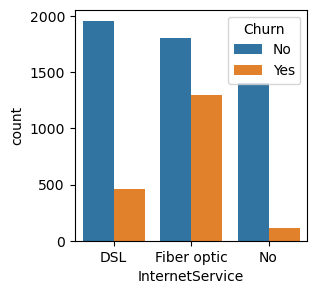

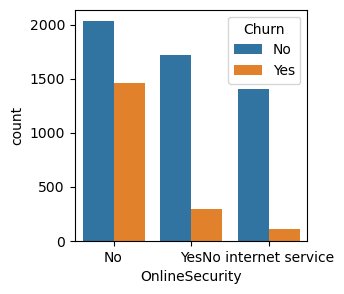

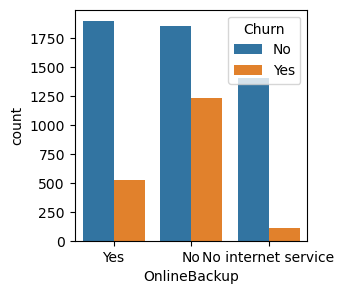

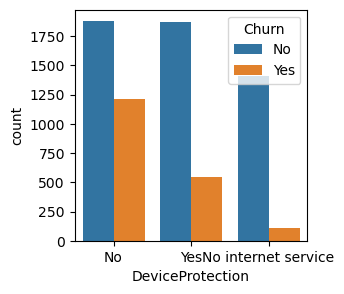

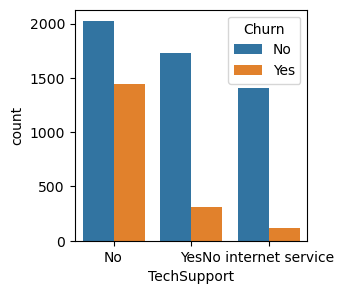

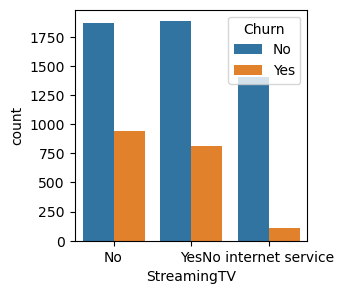

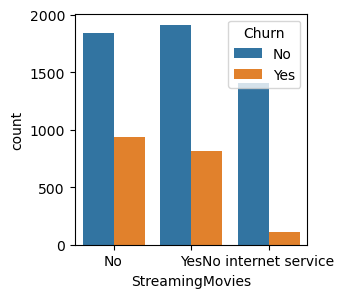

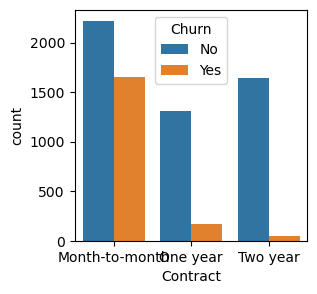

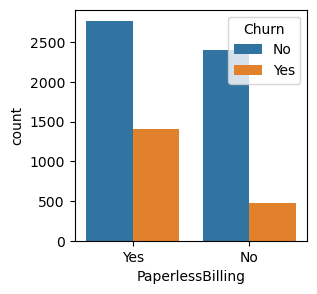

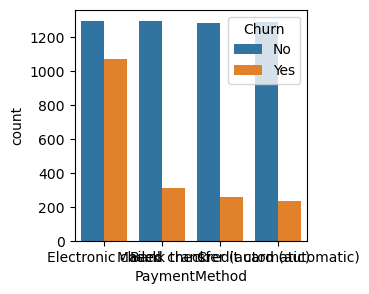

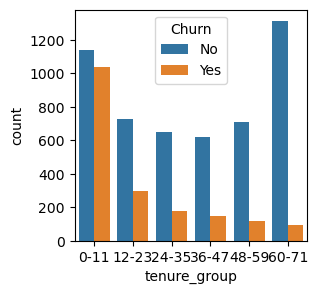

In [33]:
new_list = df.drop(columns=['Churn' , 'TotalCharges' ,  'MonthlyCharges'])
for i , predictor in enumerate(new_list):
    plt.figure(i ,  figsize =(3,3))
    sns.countplot(data = df , x = predictor , hue = 'Churn')
    

# LABEL ENCODING

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 n

In [35]:
#creating a list of all columns where dtype is object
col_object = df.select_dtypes(include = ['object']).columns.tolist() 

In [36]:
col_object

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [37]:
df.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn tenure_group  
0           Electronic check           29.85         29.85    No         0-11  
1               Mailed check           56.95       1889.50    No        24-35  
2               Mailed check           53.85        108.15   Yes         0-11  
3  Bank transfer (automatic)           42.30       1840.75    No        36-47  
4           Electronic check           70.70        151.65   Yes         0-11

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])


In [39]:
df

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0     Female              0     Yes         No           No  No phone service   
1       Male              0      No         No          Yes                No   
2       Male              0      No         No          Yes                No   
3       Male              0      No         No           No  No phone service   
4     Female              0      No         No          Yes                No   
...      ...            ...     ...        ...          ...               ...   
7038    Male              0     Yes        Yes          Yes               Yes   
7039  Female              0     Yes        Yes          Yes               Yes   
7040  Female              0     Yes        Yes           No  No phone service   
7041    Male              1     Yes         No          Yes               Yes   
7042    Male              0      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  Churn  \
0              Electronic check           29.85         29.85      0   
1                  Mailed check           56.95       1889.50      0   
2                  Mailed check           53.85        108.15      1   
3     Bank transfer (automatic)           42.30       1840.75      0   
4              Electronic check           70.70        151.65      1   
...                         ...             ...           ...    ...   
7038               Mailed check           84.80       1990.50      0   
7039    Credit card (automatic)          103.20       7362.90      0   
7040           Electronic check           29.60        346.45      0   
7041               Mailed check           74.40        306.60      1   
7042  Bank transfer (automatic)          105.65       6844.50      0   

     tenure_group  
0            0-11  
1           24-35  
2            0-11  
3           36-47  
4            0-11  
...           ...  
7038        12-23  
7039        60-71  
7040         0-11  
7041         0-11  
7042        60-71  

[7032 rows x 20 columns]

In [40]:
df.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  Churn tenure_group  
0           Electronic check           29.85         29.85      0         0-11  
1               Mailed check           56.95       1889.50      0        24-35  
2               Mailed check           53.85        108.15      1         0-11  
3  Bank transfer (automatic)           42.30       1840.75      0        36-47  
4           Electronic check           70.70        151.65      1         0-11

###### since our dataset now has 0,1,2.. in place of object types so we need to make sure that model does not take them as ranks 

##### so we use one hot encoding using dummies

# one hot encoding

# convert all categorical values to dummy values 

In [41]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0           29.85         29.85      0              1   
1              0           56.95       1889.50      0              0   
2              0           53.85        108.15      1              0   
3              0           42.30       1840.75      0              0   
4              0           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0            0           0            1              1               0  ...   
1            1           1            0              1               0  ...   
2            1           1            0              1               0  ...   
3            1           1            0              1               0  ...   
4            0           1            0              1               0  ...   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  tenure_group_0-11  tenure_group_12-23  \
0                           0                  1                   0   
1                           1                  0                   0   
2                           1                  1                   0   
3                           0                  0                   0   
4                           0                  1                   0   

   tenure_group_24-35  tenure_group_36-47  tenure_group_48-59  \
0                   0                   0                   0   
1                   1                   0                   0   
2                   0                   0                   0   
3                   0                   1                   0   
4                   0                   0                   0   

   tenure_group_60-71  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 51 columns]

##### the number of columns has increased as we have used one hot encoding

#### checking the relationship between monthly charges and total charges 

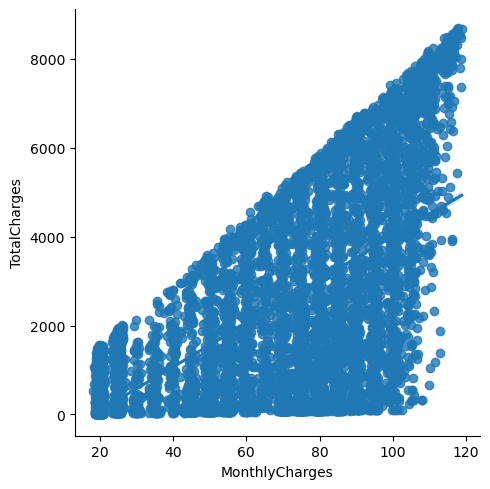

In [42]:
sns.lmplot(x="MonthlyCharges" , y ="TotalCharges" , data = df)

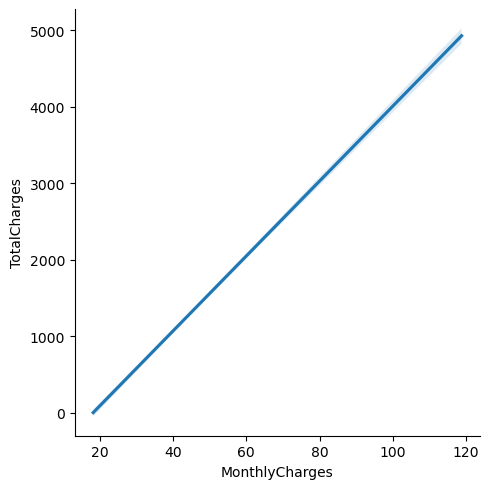

In [43]:
sns.lmplot(x='MonthlyCharges'  , y = 'TotalCharges' , data= df , scatter = False)

#### This shows that monthly charges and total charges have a positive linear relationship .

#### using KDE to get insights of churn and monthly charges 

C:\Users\Shagun Gupta\AppData\Local\Temp\ipykernel_9568\581253971.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  c_t = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==0)] , color = 'Blue' , shade =True)
C:\Users\Shagun Gupta\AppData\Local\Temp\ipykernel_9568\581253971.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  c_t = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==1)] , color = 'Green' , shade = True )


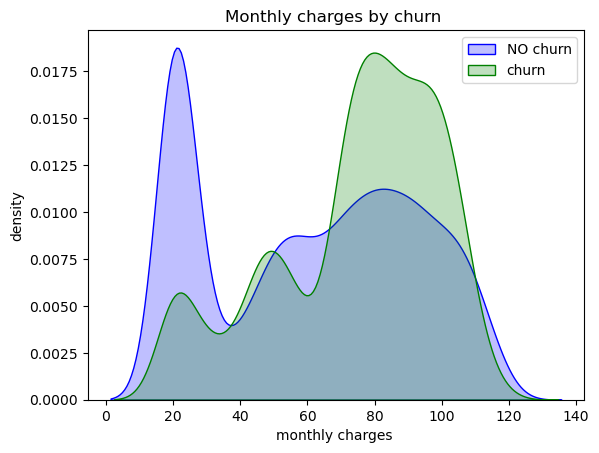

In [44]:
c_t = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==0)] , color = 'Blue' , shade =True)
c_t = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==1)] , color = 'Green' , shade = True )
c_t.legend(["NO churn"  ,'churn'] )
c_t.set_ylabel('density')
c_t.set_xlabel("monthly charges ")
c_t.set_title("Monthly charges by churn ")
plt.show()

#### churn is high when monthly charges is high 

###### corelation of all the predictors with churn 

In [45]:
df_dummies

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0                 0           29.85         29.85      0              1   
1                 0           56.95       1889.50      0              0   
2                 0           53.85        108.15      1              0   
3                 0           42.30       1840.75      0              0   
4                 0           70.70        151.65      1              1   
...             ...             ...           ...    ...            ...   
7038              0           84.80       1990.50      0              0   
7039              0          103.20       7362.90      0              1   
7040              0           29.60        346.45      0              1   
7041              1           74.40        306.60      1              0   
7042              0          105.65       6844.50      0              0   

      gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0               0           0            1              1               0   
1               1           1            0              1               0   
2               1           1            0              1               0   
3               1           1            0              1               0   
4               0           1            0              1               0   
...           ...         ...          ...            ...             ...   
7038            1           0            1              0               1   
7039            0           0            1              0               1   
7040            0           0            1              0               1   
7041            1           0            1              1               0   
7042            1           1            0              1               0   

      ...  PaymentMethod_Bank transfer (automatic)  \
0     ...                                        0   
1     ...                                        0   
2     ...                                        0   
3     ...                                        1   
4     ...                                        0   
...   ...                                      ...   
7038  ...                                        0   
7039  ...                                        0   
7040  ...                                        0   
7041  ...                                        0   
7042  ...                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7038                                      0                               0   
7039                                      1                               0   
7040                                      0                               1   
7041                                      0                               0   
7042                                      0                               0   

      PaymentMethod_Mailed check  tenure_group_0-11  tenure_group_12-23  \
0                              0                  1                   0   
1                              1                  0                   0   
2                              1                  1                   0   
3                              0                  0                   0   
4                              0                  1                   0   
...                          ...                ...                 ...   
7038                           1                  0      

<Axes: >

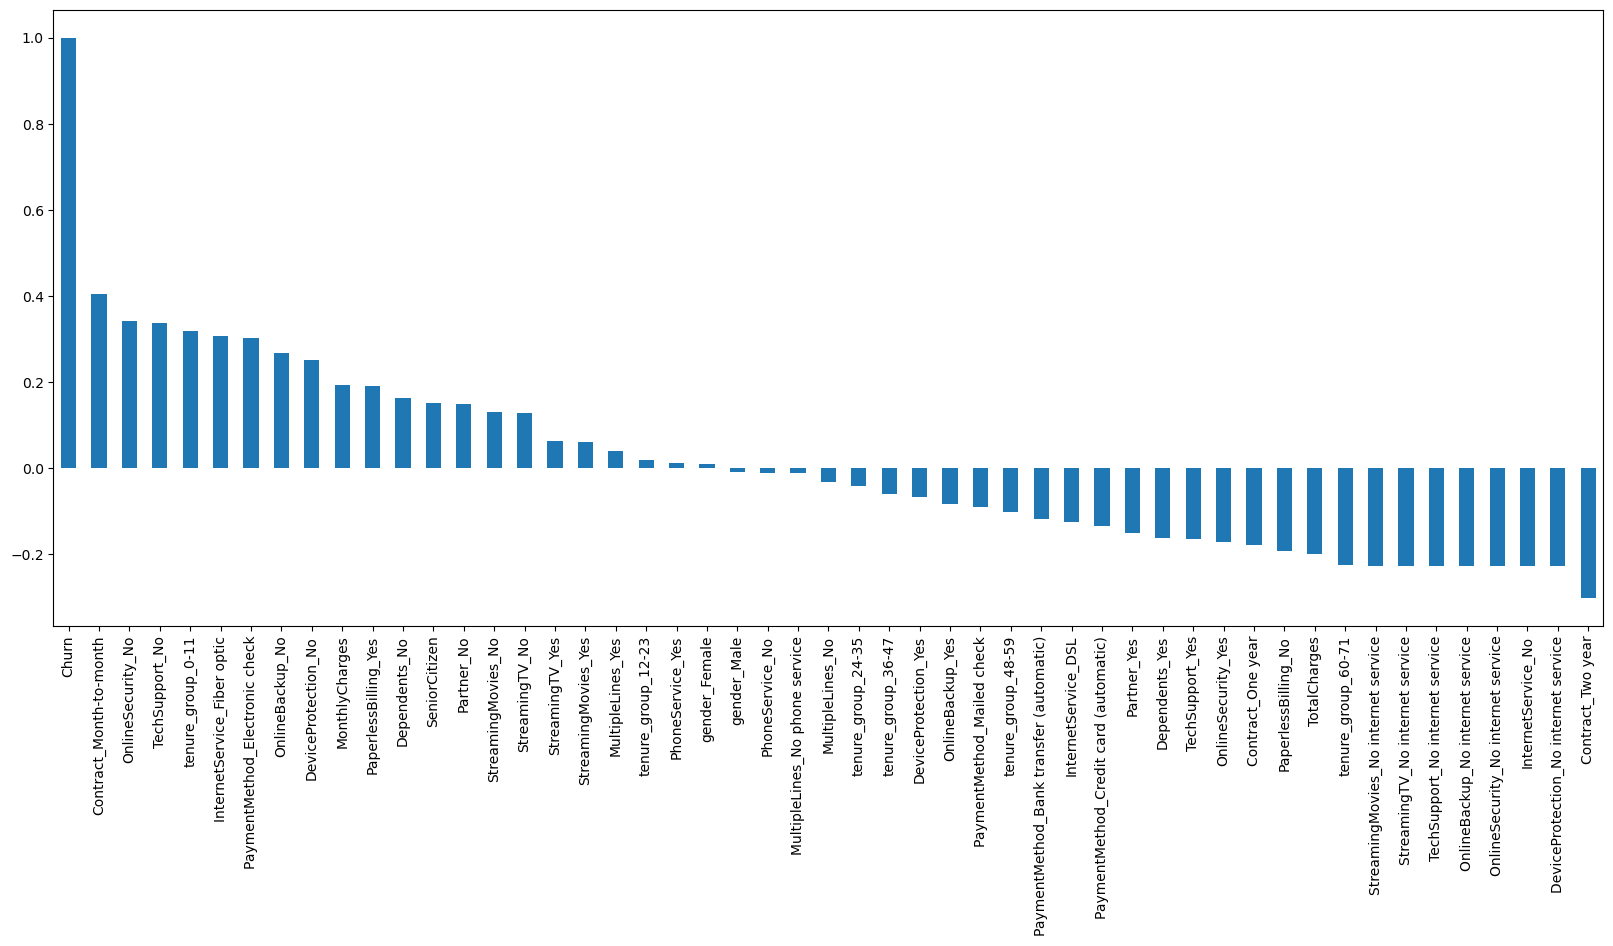

In [46]:
plt.figure(figsize = (20 , 8))
df_dummies.corr()["Churn"].sort_values(ascending = False ).plot(kind = 'bar')

#### correlation between churn and contract month to month is highest i.e 0.4 this means that high churn is seen in case of month to month contracts ,no online security , no tech support , first year of subscription and fibre optics internet . LOW churn is seen in case of long term contracts , subscription without internet service and customers engaged for 5+ years . factors like gender , availability of phone service and number of multiple  lines have almost no impact on churn .
### HEATMAP

<Axes: >

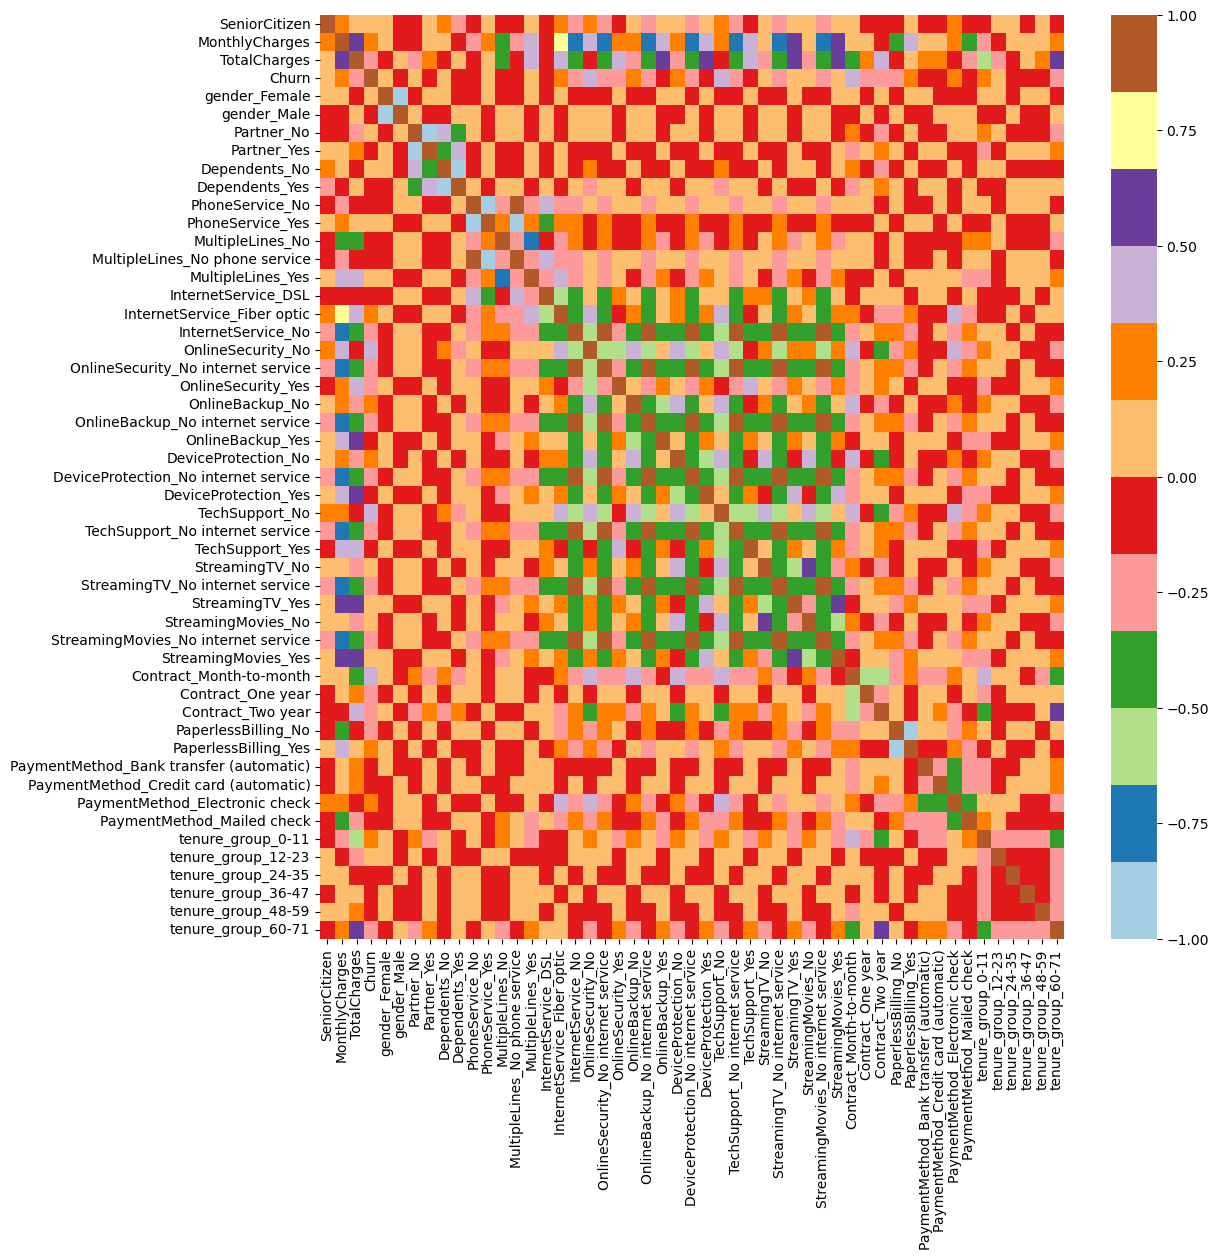

In [47]:
plt.figure(figsize = (12,12))
sns.heatmap(df_dummies.corr() , cmap = 'Paired')

# BIVARIATE ANALYSIS

In [48]:
new_df_target0 = df.loc[df_dummies['Churn']==0]
new_df_target1 = df.loc[df_dummies['Churn']==1]

In [49]:


def uniplot(df, col, title, hue=None):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30
    
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(df[hue].unique()) if hue else len(df[col].unique()) + 7
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale("log")
    plt.title(title)
    
    if hue:
        ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    else:
        ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='bright')
    
    plt.show()


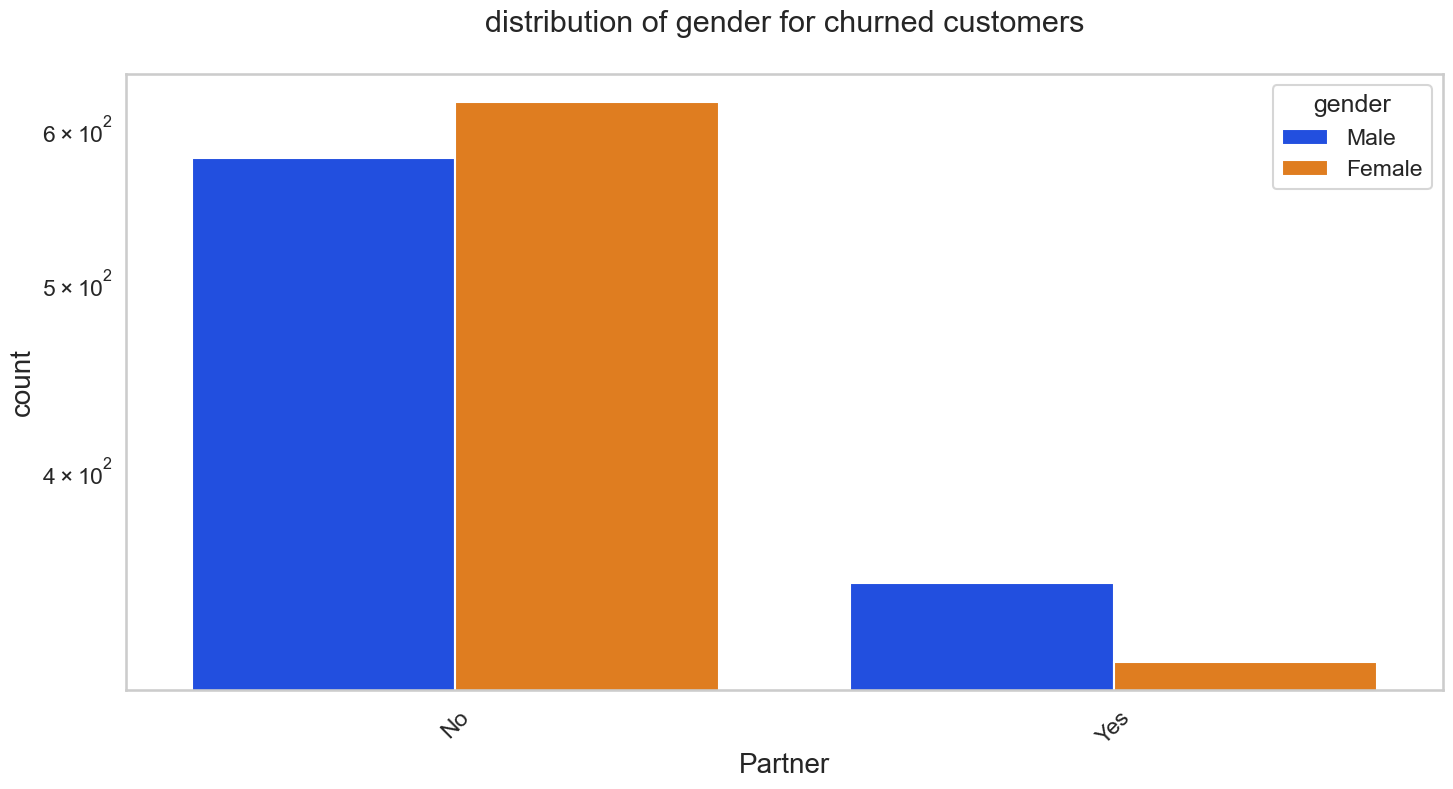

In [50]:
uniplot(new_df_target1 , col='Partner' , title = "distribution of gender for churned customers" , hue = 'gender')

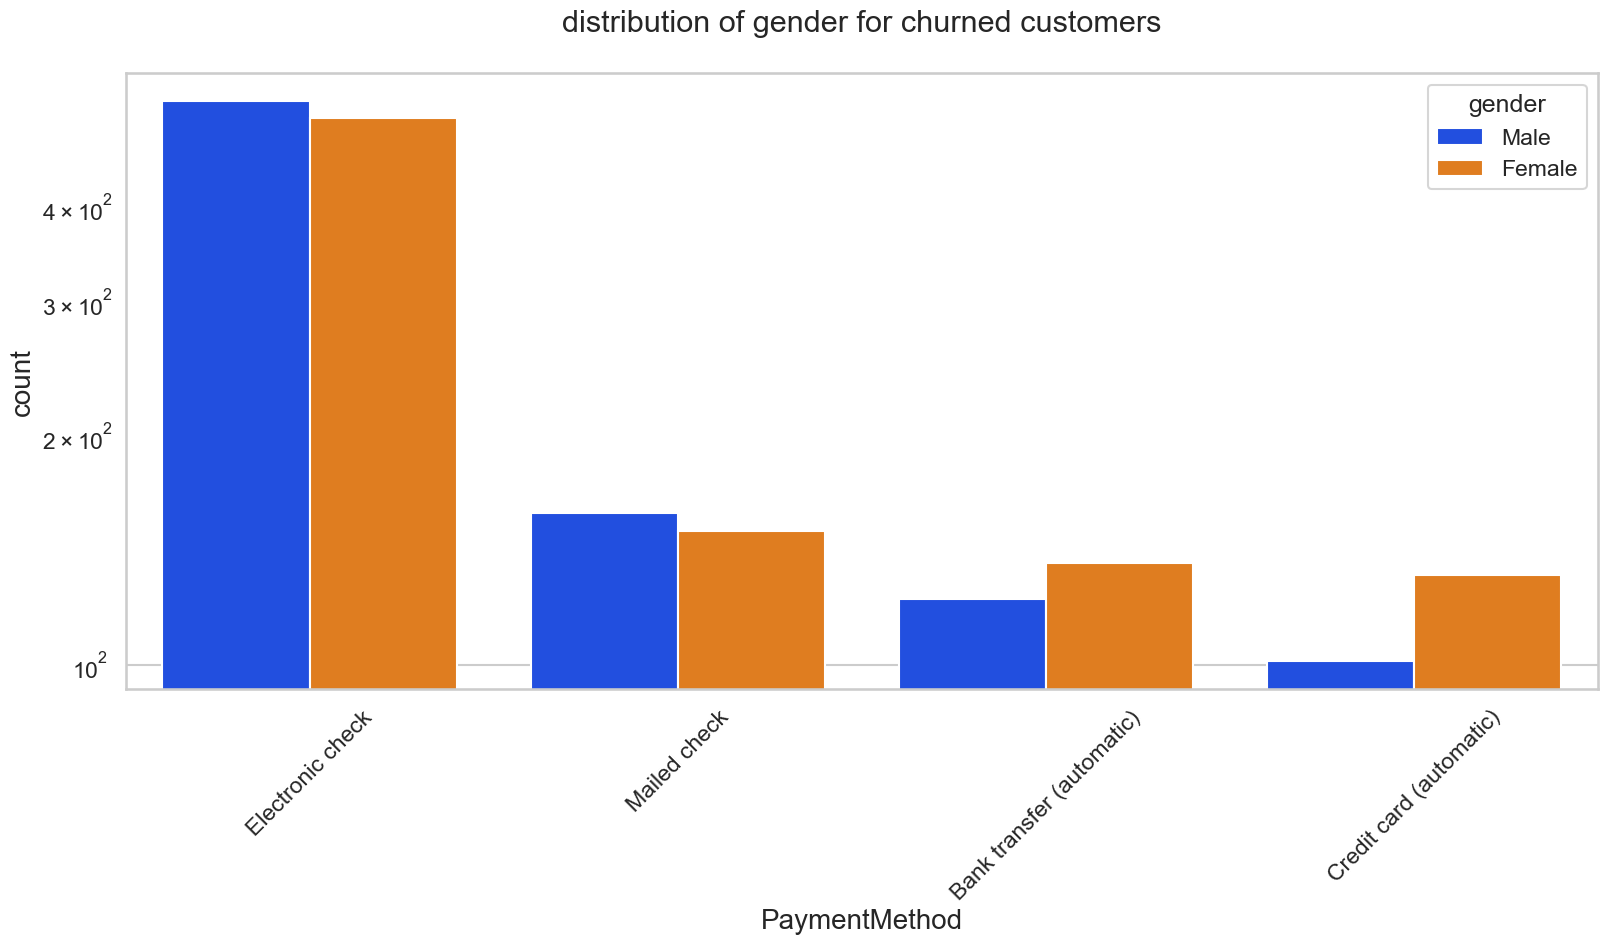

In [51]:
uniplot(new_df_target1 , col='PaymentMethod' , title = "distribution of gender for churned customers" , hue = 'gender')

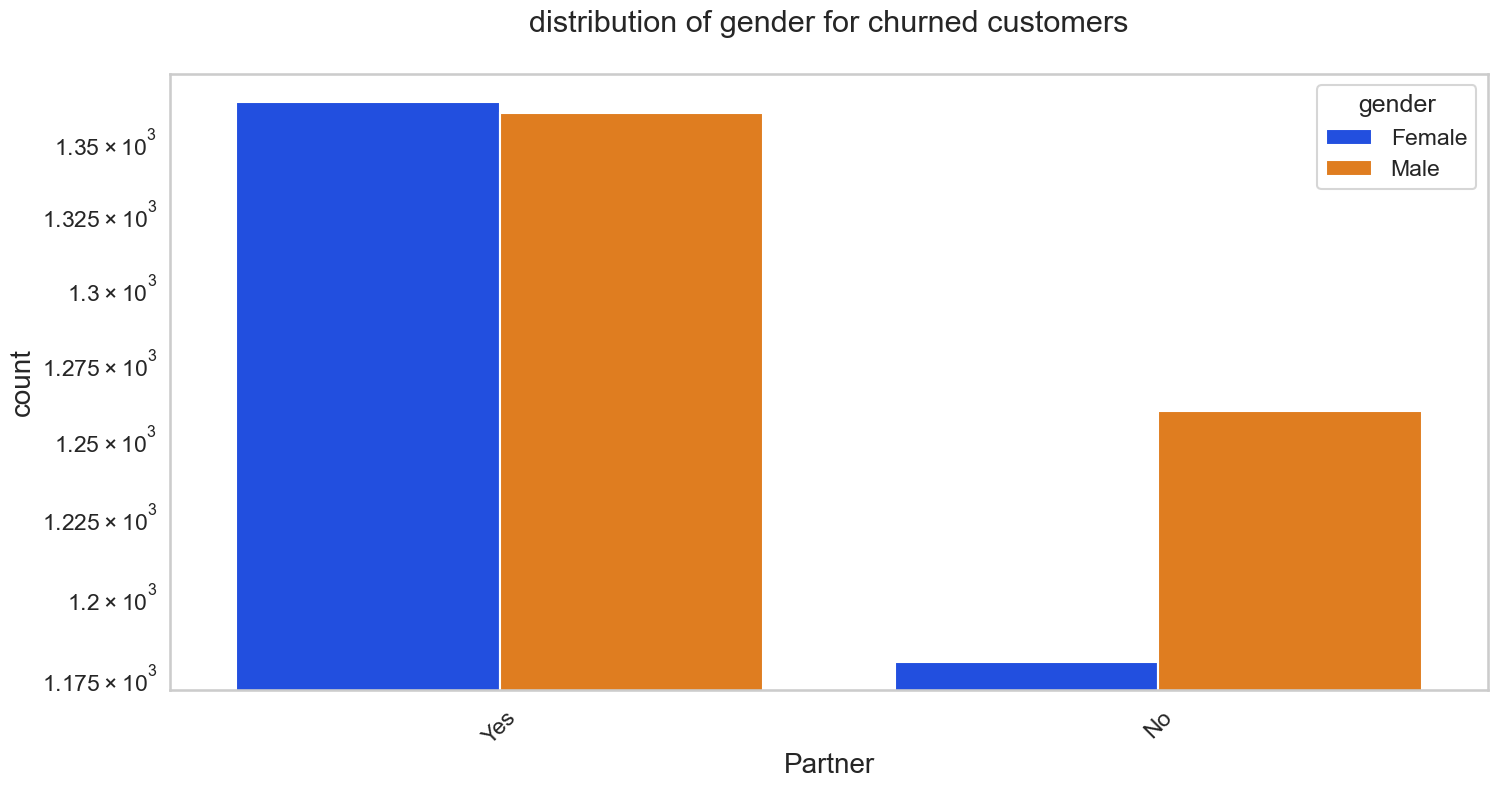

In [52]:
uniplot(new_df_target0 , col='Partner' , title = "distribution of gender for churned customers" , hue = 'gender')

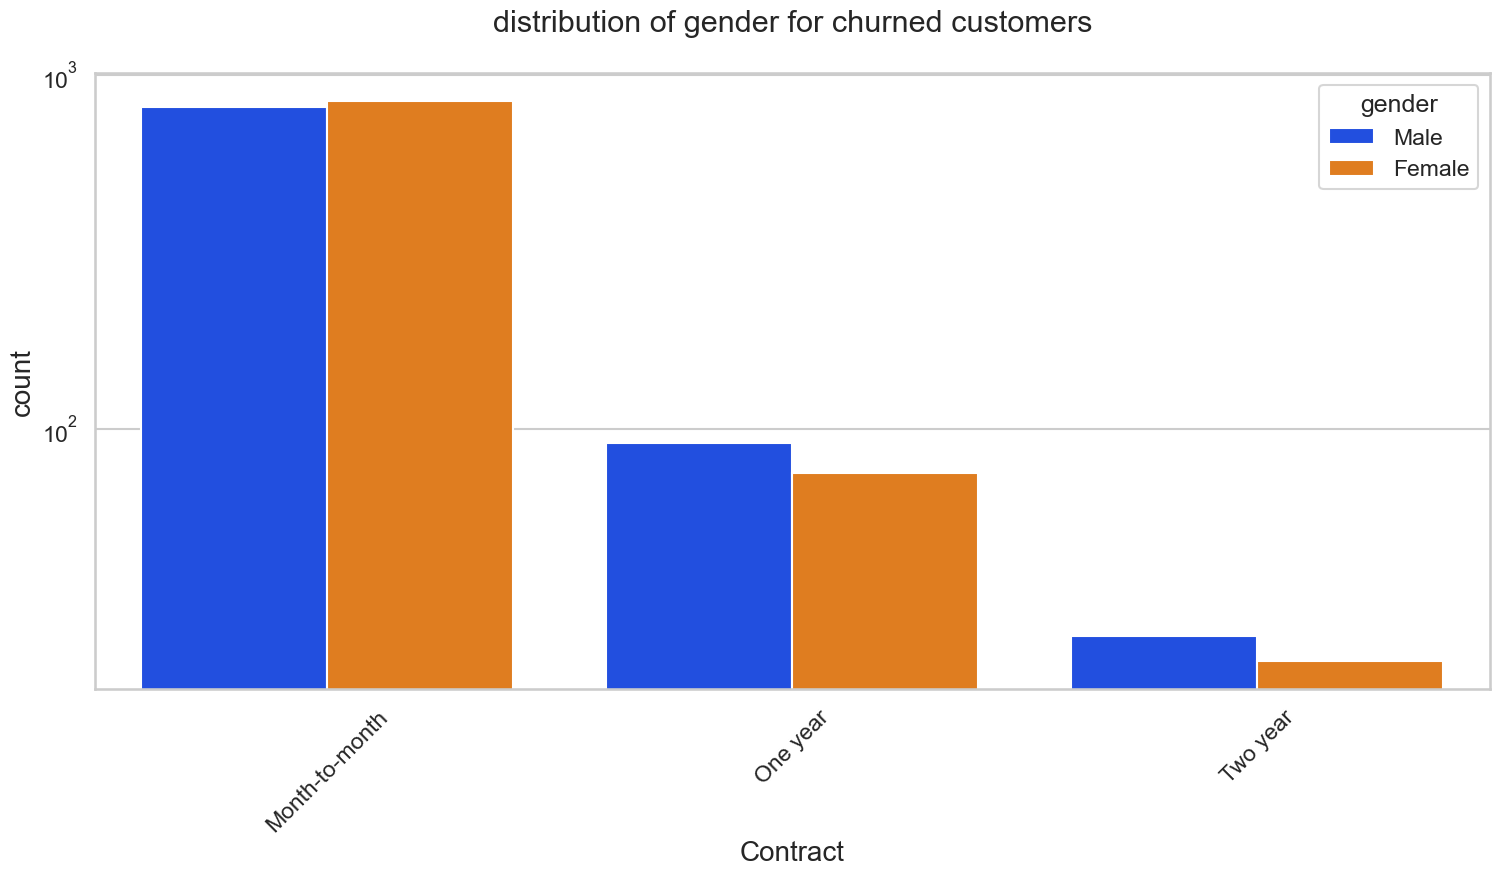

In [53]:
uniplot(new_df_target1 , col='Contract' , title = "distribution of gender for churned customers" , hue = 'gender')

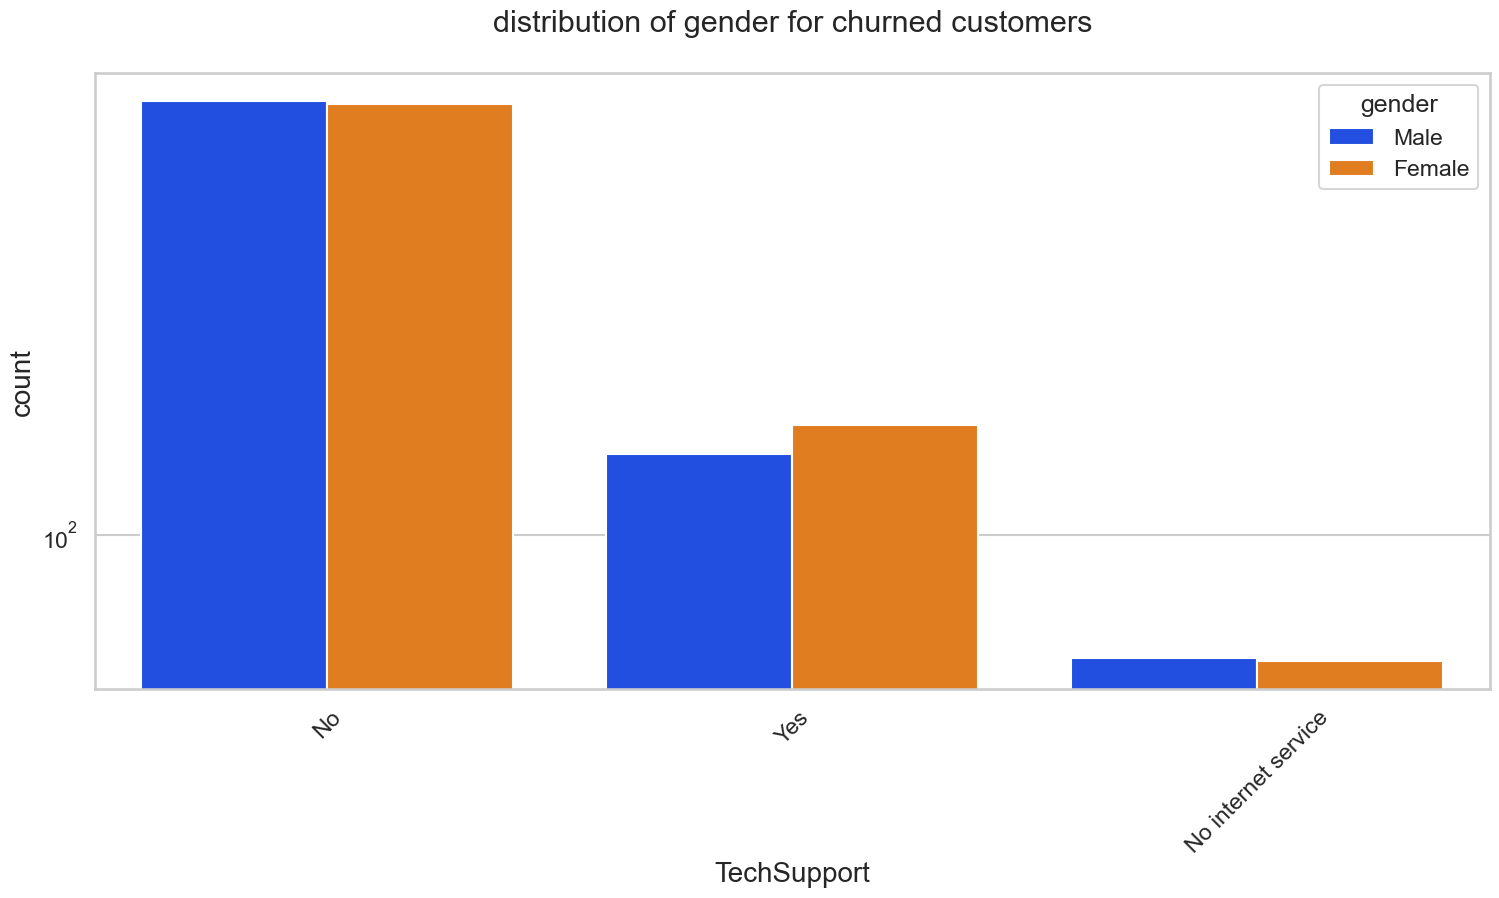

In [54]:
uniplot(new_df_target1 , col='TechSupport' , title = "distribution of gender for churned customers" , hue = 'gender')

### from the above visualizations we get to know that :
#### electronic check medium are the highest churners 
#### month to month contract type customers are more likely to churn 
#### no online security , no tech suppport category are high churners 
#### non senior citizens are high churners 

In [55]:
model_df = df_dummies

# CHURN PREDICTION MODEL  

In [56]:
# creating X and Y variables 
X = model_df.drop("Churn" ,  axis = 1 )

In [57]:
X

SeniorCitizen  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0                 0           29.85         29.85              1            0   
1                 0           56.95       1889.50              0            1   
2                 0           53.85        108.15              0            1   
3                 0           42.30       1840.75              0            1   
4                 0           70.70        151.65              1            0   
...             ...             ...           ...            ...          ...   
7038              0           84.80       1990.50              0            1   
7039              0          103.20       7362.90              1            0   
7040              0           29.60        346.45              1            0   
7041              1           74.40        306.60              0            1   
7042              0          105.65       6844.50              0            1   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0              0            1              1               0                1   
1              1            0              1               0                0   
2              1            0              1               0                0   
3              1            0              1               0                1   
4              1            0              1               0                0   
...          ...          ...            ...             ...              ...   
7038           0            1              0               1                0   
7039           0            1              0               1                0   
7040           0            1              0               1                1   
7041           0            1              1               0                0   
7042           1            0              1               0                0   

      ...  PaymentMethod_Bank transfer (automatic)  \
0     ...                                        0   
1     ...                                        0   
2     ...                                        0   
3     ...                                        1   
4     ...                                        0   
...   ...                                      ...   
7038  ...                                        0   
7039  ...                                        0   
7040  ...                                        0   
7041  ...                                        0   
7042  ...                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7038                                      0                               0   
7039                                      1                               0   
7040                                      0                               1   
7041                                      0                               0   
7042                                      0                               0   

      PaymentMethod_Mailed check  tenure_group_0-11  tenure_group_12-23  \
0                              0                  1                   0   
1                              1                  0                   0   
2                              1                  1                   0   
3                              0                  0                   0   
4                              0                  1                   0   
...         

In [58]:
Y = model_df['Churn']

In [59]:
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

### spliting training and testing data 

In [60]:
#importing the required libraries 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from imblearn.combine import SMOTEENN


In [61]:
x_train_lr , x_test_lr , y_train_lr , y_test_lr = train_test_split(X,Y, test_size = 0.2)

In [62]:
x_train_lr

SeniorCitizen  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
299               0           73.60         73.60              1            0   
1112              1           89.85       6293.45              1            0   
130               0           85.95       1215.65              1            0   
2760              0           20.65        595.50              0            1   
6602              0           96.35       3915.40              1            0   
...             ...             ...           ...            ...          ...   
6262              0           96.75       4442.75              1            0   
2148              0           19.55        128.60              0            1   
4005              0           24.05         24.05              0            1   
3848              0           49.20        103.70              1            0   
5825              1           70.30         70.30              0            1   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
299            1            0              0               1                0   
1112           1            0              1               0                0   
130            1            0              1               0                0   
2760           1            0              1               0                0   
6602           0            1              0               1                0   
...          ...          ...            ...             ...              ...   
6262           1            0              1               0                0   
2148           1            0              0               1                0   
4005           1            0              1               0                0   
3848           1            0              1               0                0   
5825           0            1              1               0                0   

      ...  PaymentMethod_Bank transfer (automatic)  \
299   ...                                        0   
1112  ...                                        0   
130   ...                                        0   
2760  ...                                        0   
6602  ...                                        0   
...   ...                                      ...   
6262  ...                                        1   
2148  ...                                        0   
4005  ...                                        0   
3848  ...                                        0   
5825  ...                                        0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
299                                       0                               0   
1112                                      0                               0   
130                                       0                               1   
2760                                      1                               0   
6602                                      1                               0   
...                                     ...                             ...   
6262                                      0                               0   
2148                                      0                               0   
4005                                      0                               0   
3848                                      0                               0   
5825                                      0                               1   

      PaymentMethod_Mailed check  tenure_group_0-11  tenure_group_12-23  \
299                            1                  1                   0   
1112                           1                  0                   0   
130                            0                  0                   1   
2760                           0                  0                   0   
6602                           0                  0                   0   
...         

#### x_train has 5625 rows which is about 80% of the dataset

In [63]:
y_train_lr.shape   #y_train for the model has 5625 values similar to X_train

(5625,)

In [64]:
y_train_lr

299     1
1112    0
130     0
2760    0
6602    0
       ..
6262    0
2148    0
4005    1
3848    0
5825    1
Name: Churn, Length: 5625, dtype: int32

In [65]:
x_test_lr

SeniorCitizen  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
4554              0          108.20       2203.70              0            1   
5201              0           19.90        164.60              0            1   
1627              0           75.90        866.40              0            1   
5552              0           20.25        488.25              0            1   
5854              0           48.80        720.10              1            0   
...             ...             ...           ...            ...          ...   
2261              0           52.15       2583.75              1            0   
3667              1           96.55       2263.45              1            0   
2916              0           44.45       2181.55              0            1   
1847              0           19.40       1083.00              1            0   
5274              1          108.10       7181.95              1            0   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
4554           1            0              1               0                0   
5201           1            0              1               0                0   
1627           1            0              1               0                0   
5552           0            1              0               1                0   
5854           1            0              1               0                0   
...          ...          ...            ...             ...              ...   
2261           0            1              1               0                0   
3667           0            1              0               1                0   
2916           1            0              1               0                1   
1847           0            1              0               1                0   
5274           0            1              1               0                0   

      ...  PaymentMethod_Bank transfer (automatic)  \
4554  ...                                        1   
5201  ...                                        0   
1627  ...                                        0   
5552  ...                                        1   
5854  ...                                        0   
...   ...                                      ...   
2261  ...                                        0   
3667  ...                                        0   
2916  ...                                        0   
1847  ...                                        0   
5274  ...                                        0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
4554                                      0                               0   
5201                                      0                               1   
1627                                      0                               0   
5552                                      0                               0   
5854                                      0                               0   
...                                     ...                             ...   
2261                                      1                               0   
3667                                      0                               1   
2916                                      1                               0   
1847                                      1                               0   
5274                                      1                               0   

      PaymentMethod_Mailed check  tenure_group_0-11  tenure_group_12-23  \
4554                           0                  0                   1   
5201                           0                  1                   0   
1627                           1                  1                   0   
5552                           0                  0                   1   
5854                           1                  0                   1   
...         

In [66]:
y_test_lr

4554    0
5201    0
1627    0
5552    0
5854    0
       ..
2261    0
3667    0
2916    0
1847    0
5274    0
Name: Churn, Length: 1407, dtype: int32

In [67]:
y_test_lr.shape

(1407,)

##### testing data set has 1407 rows which is about 20% of data

# LOGISTIC REGRESSION 

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
rg = LogisticRegression()

In [70]:
model_rg =rg.fit(x_train_lr , y_train_lr)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
y_pred_lr = model_rg.predict(x_test_lr) 

In [72]:
accuracy_score(y_test_lr , y_pred_lr)

NameError: name 'accuracy_score' is not defined

In [ ]:
print(classification_report(y_test_lr , y_pred_lr))

In [73]:
confusion_matrix(y_test_lr , y_pred_lr)

array([[942,  85],
       [198, 182]], dtype=int64)

<Axes: >

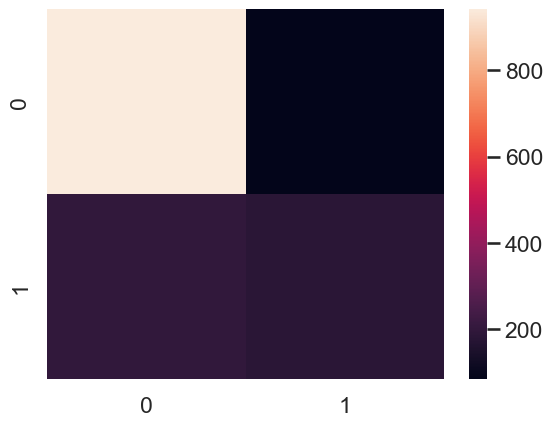

In [74]:
sns.heatmap(confusion_matrix(y_test_lr , y_pred_lr))

### ACCURACY is around 79% which is a little less

# DECISION TREE 

In [75]:
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size = 0.2)

In [76]:
model_dt = DecisionTreeClassifier(criterion ='gini' , random_state = 100 , max_depth=6 , min_samples_leaf = 8)

##### we are using gini index as the criterion of selecting nodes 
##### we took a small max_depth to avoid overfitting

In [77]:
model_dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [78]:
y_pred = model_dt.predict(x_test)

In [79]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

## confusion matrix

In [80]:
confusion_matrix(y_test , y_pred)

array([[909, 121],
       [173, 204]], dtype=int64)

In [81]:
tn , fp , fn , tp = confusion_matrix(y_test , y_pred).ravel()

In [82]:
tn , fp, fn , tp

(909, 121, 173, 204)

Text(0.5, 1.0, 'confusion matrix heatmap')

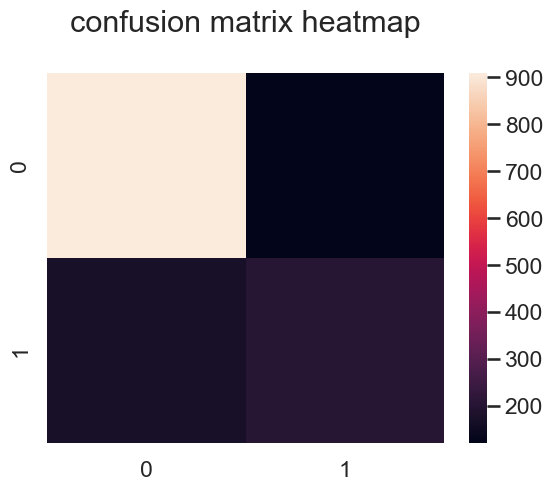

In [83]:
sns.heatmap(confusion_matrix(y_test , y_pred))
plt.title("confusion matrix heatmap")

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(y_test , y_pred)

0.7910447761194029

### the accuracy sore of decision tree is 0.8002

In [86]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1030
           1       0.63      0.54      0.58       377

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



### the accuracy is less and dataset is imbalanced 

 ### using SMOTEENN for upsampling or downsampling 

In [87]:
sm = SMOTEENN()
X_resampled , Y_resampled = sm.fit_resample(X,Y)

In [88]:
xr_train , xr_test , yr_train , yr_test  = train_test_split(X_resampled , Y_resampled , test_size = 0.2) 

In [89]:
model_dt_sm = DecisionTreeClassifier(criterion ='gini' , random_state = 100 , max_depth=6 , min_samples_leaf = 8)

In [90]:
model_dt_sm.fit(xr_train , yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [91]:
yr_pred =model_dt_sm.predict(xr_test)

In [92]:
confusion_matrix(yr_test , yr_pred)

array([[465,  54],
       [ 33, 629]], dtype=int64)

<Axes: >

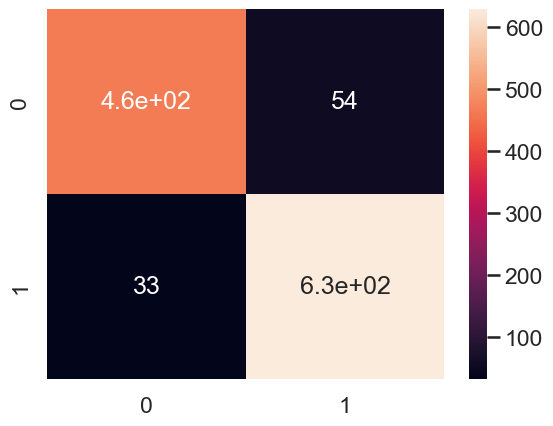

In [93]:
sns.heatmap(confusion_matrix(yr_test , yr_pred) , annot=True)

#### DECISION TREE FIGURE:

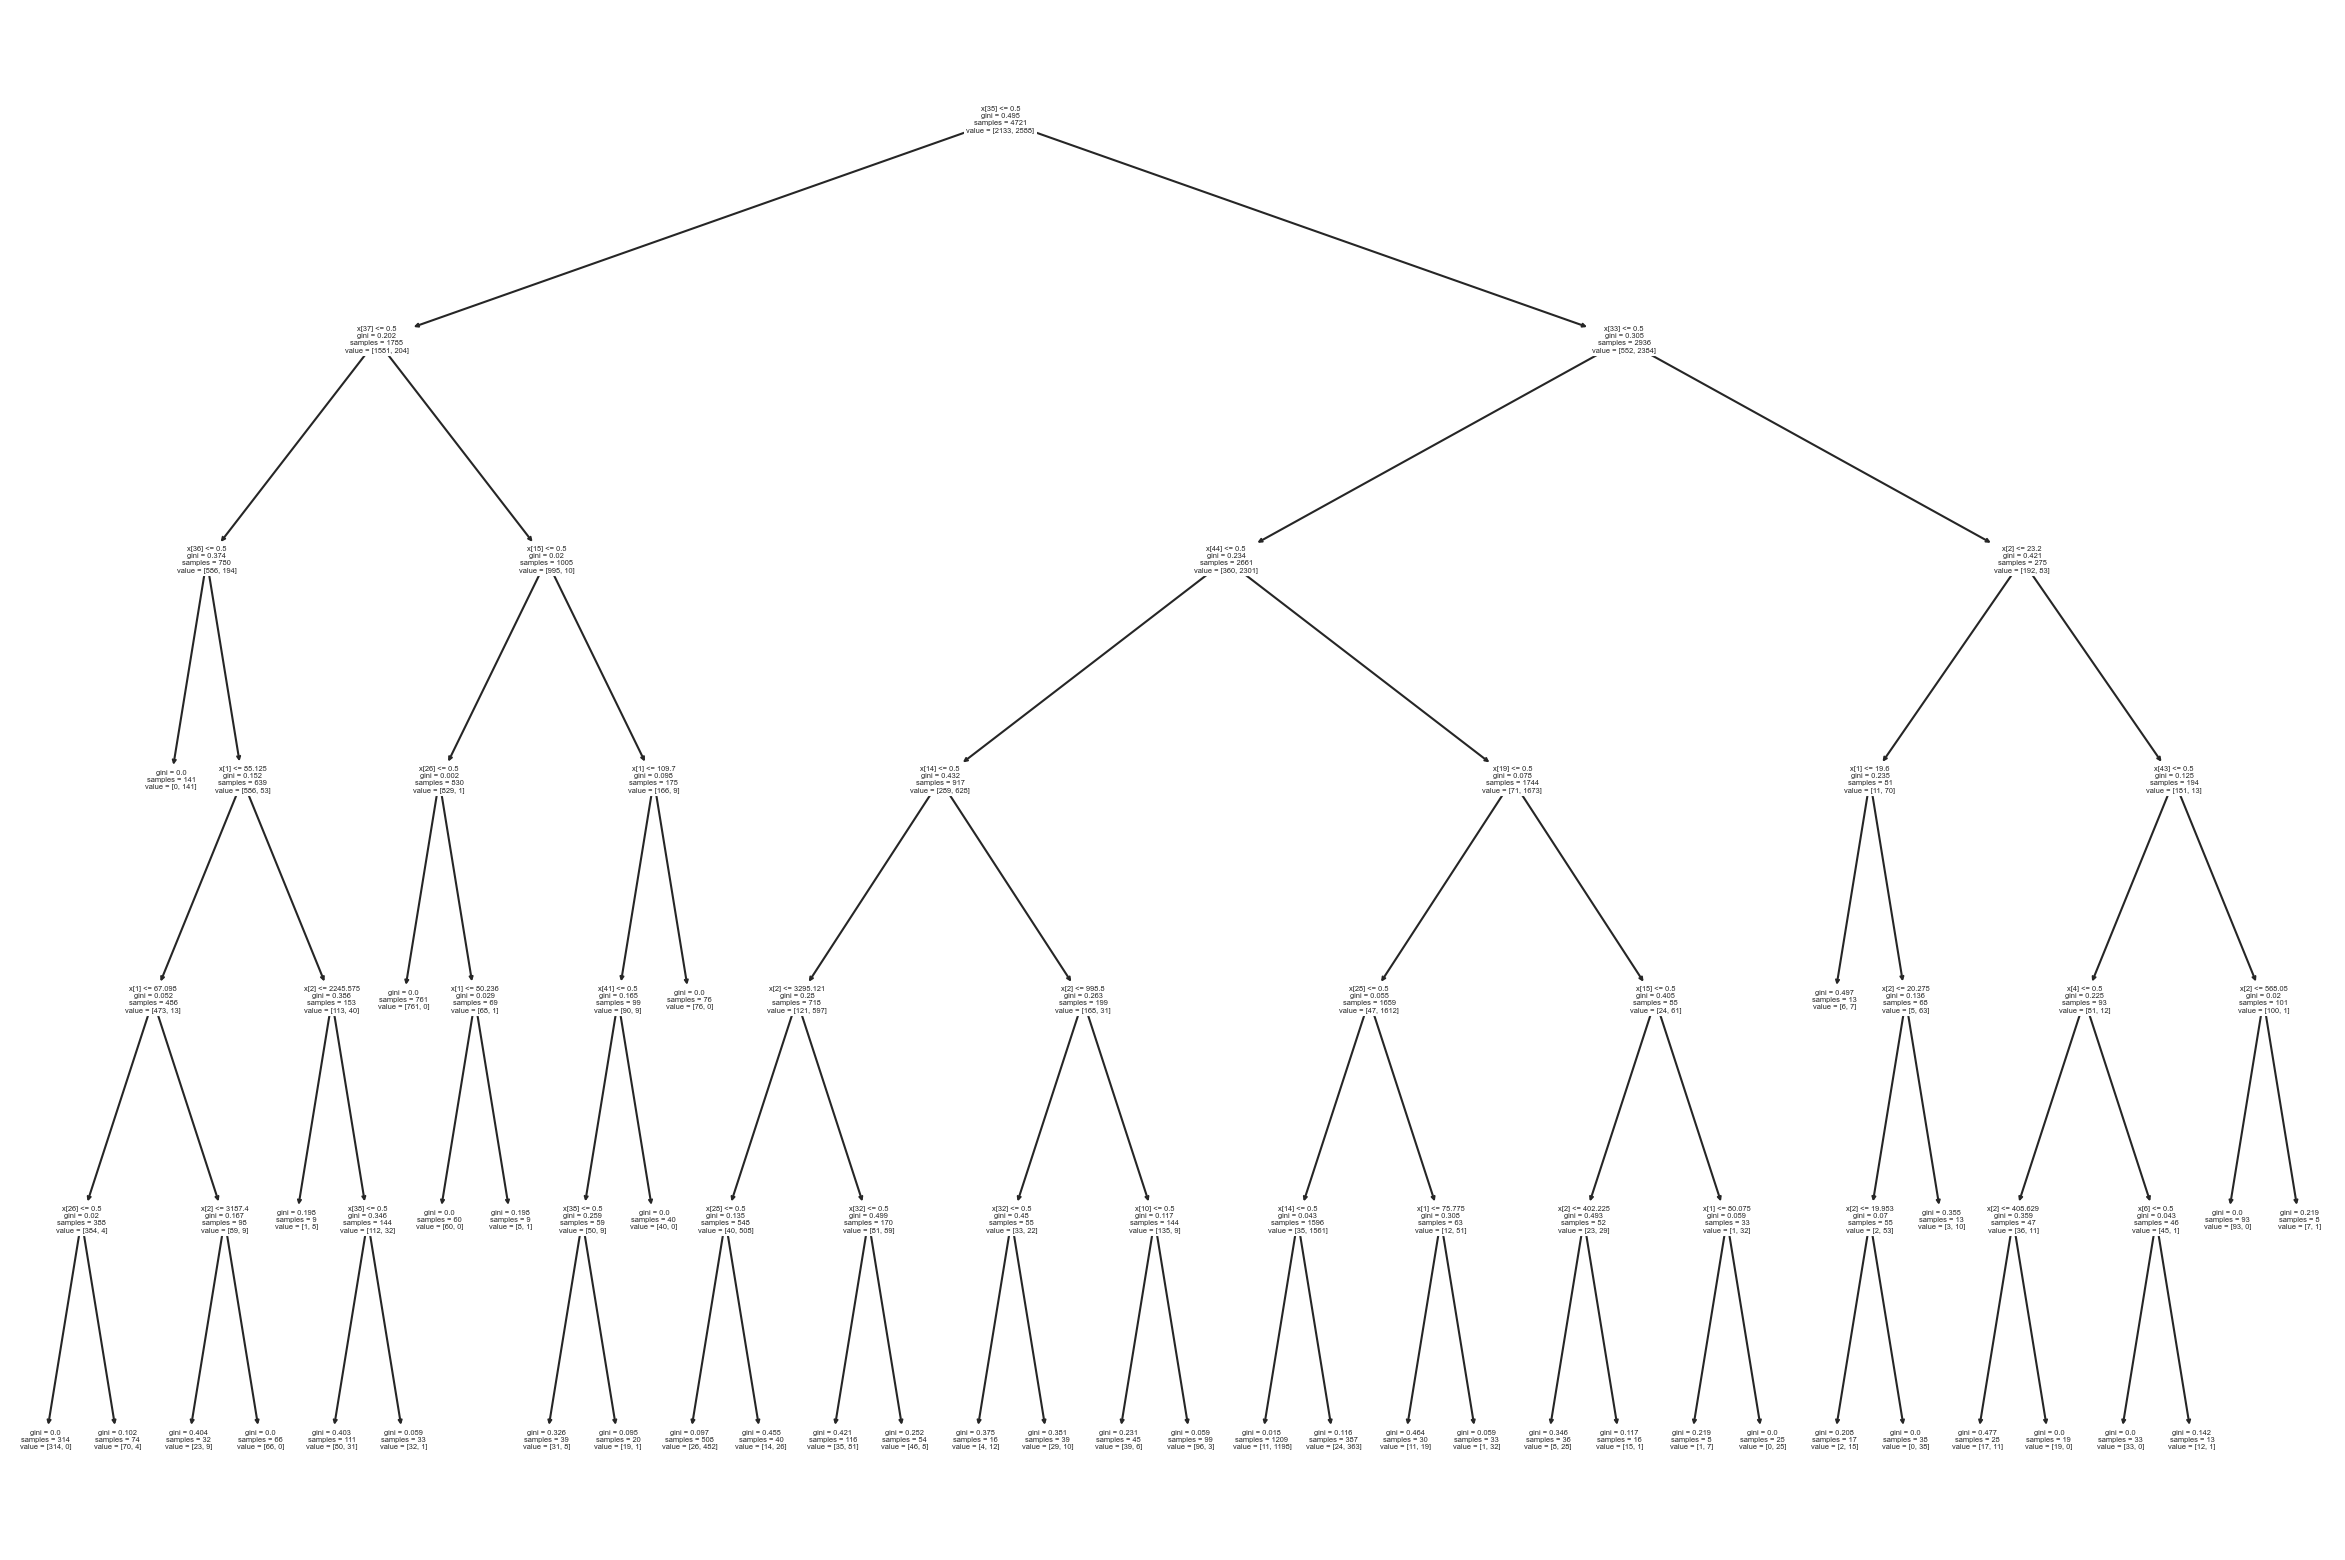

In [94]:
plt.figure(figsize = (30,20))
from sklearn import tree
tree.plot_tree(model_dt_sm)
plt.show()

In [95]:
accuracy_score(yr_test , yr_pred )

0.9263336155800169

In [96]:
print(classification_report(yr_test , yr_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       519
           1       0.92      0.95      0.94       662

    accuracy                           0.93      1181
   macro avg       0.93      0.92      0.92      1181
weighted avg       0.93      0.93      0.93      1181



## the accuracy of our model is around 92.3011% which is pretty good 

# RANDOM FOREST CLASSIFIER

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
model_rf = RandomForestClassifier(n_estimators = 100 , criterion ='gini' , random_state = 50 , max_depth = 6 , min_samples_leaf = 8 )


In [99]:
model_rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=50)

In [100]:
y_pred_rf = model_rf.predict(x_test)

In [101]:
confusion_matrix(y_test , y_pred_rf)

array([[955,  75],
       [203, 174]], dtype=int64)

In [102]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1030
           1       0.70      0.46      0.56       377

    accuracy                           0.80      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [103]:
accuracy_score(y_test , y_pred_rf)

0.8024164889836531

#### accuracy is only 80% 

## using SWOTEENN to balance the data 

In [104]:
sm = SMOTEENN()
X_resampled_rf , Y_resampled_rf = sm.fit_resample(X,Y)

In [105]:
x_train_rf , x_test_rf , y_train_rf , y_test_rf = train_test_split(X_resampled_rf , Y_resampled_rf ,  test_size = 0.2  )

In [106]:
model_rf_sm = RandomForestClassifier(n_estimators = 100 , criterion ='gini' , random_state = 50 , max_depth = 6 , min_samples_leaf = 8 ) 

In [107]:
model_rf_sm.fit(x_train_rf , y_train_rf)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=50)

In [108]:
y_pred_rf_sm = model_rf_sm.predict(x_test_rf )

In [109]:
confusion_matrix(y_test_rf,y_pred_rf_sm) 

array([[479,  45],
       [ 34, 610]], dtype=int64)

<Axes: >

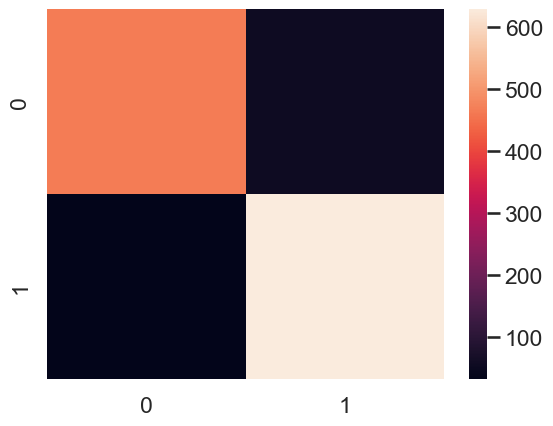

In [110]:
sns.heatmap(confusion_matrix(yr_test , yr_pred) )

In [111]:
accuracy_score(y_test_rf,y_pred_rf_sm)

0.9323630136986302

In [112]:
print(classification_report(y_test_rf , y_pred_rf_sm))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       524
           1       0.93      0.95      0.94       644

    accuracy                           0.93      1168
   macro avg       0.93      0.93      0.93      1168
weighted avg       0.93      0.93      0.93      1168



## ACCURACY is around 94% which very good  

## on comparing we conclude RANDOM FOREST CLASSIFIER MODEL has given best accuracy

#### SAVING AND LOADING MODEL

In [113]:
import pickle 

In [114]:
filename = "model.sav"

In [115]:
pickle.dump(model_rf_sm , open(filename  , 'wb'))

In [116]:
load_model = pickle.load(open(filename , 'rb'))
load_model.score(xr_test , yr_test)

0.9195596951735817

### deployment

NameError: name 'new_df_dummies' is not defined